In [ ]:
import pickle
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from datetime import date
import torch.nn as nn
import torch.nn.functional as F

import shutil

import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!pip install basemap

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
import datetime
from datetime import datetime, timedelta
import time
import shutil
from calendar import monthrange
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from matplotlib import colors
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec

In [ ]:
!pip install sentence_transformers
!pip install torch_geometric

# The PyG built-in SAGEConv
from torch_geometric.nn import SAGEConv,LayerNorm,SAGEConv

import torch_geometric.transforms as T

In [ ]:
import torch.nn.functional as F
import seaborn as sns
sns.set_style('darkgrid')
import pandas as pd
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
def count_params(model):
 return sum(p.numel() for p in model.parameters())

# Model Parameter

## ANN

### ANN 1

In [ ]:
class MLP(nn.Module):

  def __init__(self,num_input,num_output):

    super(MLP, self).__init__()

    # Define the first fully connected layer

    self.fc1 = nn.Linear(num_input, 50) # Input dimension is 7, output dimension is 50

    # Define the second fully connected layer

    self.fc2 = nn.Linear(50, 50) # Input dimension is 50, output dimension is 30

    # Define the third fully connected layer

    self.fc3 = nn.Linear(50, 50) # Input dimension is 50, output dimension is 30

    # Define the output layer

    self.fc4 = nn.Linear(50, num_output) # Input dimension is 30, output dimension is 10



  def forward(self, x):

    # Apply the first layer with a ReLU activation

    x = F.relu(self.fc1(x))

    # Apply the second layer with a ReLU activation

    x = F.relu(self.fc2(x))

    # Apply the third layer with a ReLU activation

    x = F.relu(self.fc3(x))

    # Apply the output layer

    x = self.fc4(x)

    return x



# Instantiate the model

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = MLP(9,10).to(device)

In [ ]:
count_params(model)

6110

### ANN 2

In [ ]:
class MLP(nn.Module):

  def __init__(self,num_input,num_output):

    super(MLP, self).__init__()

    # Define the first fully connected layer

    self.fc1 = nn.Linear(num_input, 50) # Input dimension is 7, output dimension is 50

    # Define the first layer norm

    self.layer_norm1 = nn.LayerNorm(50)

    # Define the second fully connected layer

    self.fc2 = nn.Linear(50, 50) # Input dimension is 50, output dimension is 50

    # Define the third fully connected layer

    self.fc3 = nn.Linear(50, 50) # Input dimension is 50, output dimension is 50

    # Define the first layer norm

    self.layer_norm2 = nn.LayerNorm(50)

    # Define the output layer

    self.fc4 = nn.Linear(50, num_output) # Input dimension is 50, output dimension is 10



  def forward(self, x):

    # Apply the first layer with a ReLU activation

    x = F.relu(self.fc1(x))

    # Apply the first norm layer

    x = self.layer_norm1(x)

    # Apply the second layer with a ReLU activation

    x = F.relu(self.fc2(x))

    # Apply the third layer with a ReLU activation

    x = F.relu(self.fc3(x))

    # Apply the second norm layer

    x = self.layer_norm2(x)

    # Apply the output layer

    x = self.fc4(x)

    return x



# Instantiate the model

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = MLP(9,10).to(device)

count_params(model)

6310

### MODEL 3/4

In [ ]:
class MLP(nn.Module):

  def __init__(self,num_input,num_output):

    super(MLP, self).__init__()

    # Define the first fully connected layer

    self.fc1 = nn.Linear(num_input, 100) # Input dimension is 7, output dimension is 100

    # Define the first layer norm

    self.layer_norm1 = nn.LayerNorm(100)

    # Define the second fully connected layer

    self.fc2 = nn.Linear(100, 100) # Input dimension is 100, output dimension is 100

    # Define the third fully connected layer

    self.fc3 = nn.Linear(100, 100) # Input dimension is 100, output dimension is 100

    # Define the first layer norm

    self.layer_norm2 = nn.LayerNorm(100)

    # Define the output layer

    self.fc4 = nn.Linear(100, num_output) # Input dimension is 100, output dimension is 10



  def forward(self, x):

    # Apply the first layer with a ReLU activation

    x = F.relu(self.fc1(x))

    # Apply the first norm layer

    x = self.layer_norm1(x)

    # Apply the second layer with a ReLU activation

    x = F.relu(self.fc2(x))

    # Apply the third layer with a ReLU activation

    x = F.relu(self.fc3(x))

    # Apply the second norm layer

    x = self.layer_norm2(x)

    # Apply the output layer

    x = self.fc4(x)

    return x



# Instantiate the model

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = MLP(51,10).to(device)

count_params(model)

26810

## GCN

### GCN 1

In [ ]:
import torch.nn.functional as F



# The PyG built-in SAGEConv

from torch_geometric.nn import SAGEConv,LayerNorm,SAGEConv



import torch_geometric.transforms as T



class GCN(torch.nn.Module):

  def __init__(self, input_dim_temporal, hidden_dim, output_dim,

        dropout):

    # TODO: Implement a function that initializes self.convs,

    # self.bns, and self.softmax.

    super(GCN, self).__init__()

    input_dim = int(input_dim_temporal*2+2)

    output_dim = int(output_dim/2)

    hidden_decoder_dim = int(hidden_dim*2)

    print(4)

    print(hidden_dim)

    print(output_dim)

    #right for u component

    self.node_encoder_right = torch.nn.Sequential(torch.nn.Linear(input_dim , hidden_dim),

                           torch.nn.ReLU(),

                           torch.nn.LayerNorm(hidden_dim),

                           torch.nn.Linear(hidden_dim, hidden_dim),

                           torch.nn.ReLU(),

                           torch.nn.LayerNorm(hidden_dim),

                           )

    self.conv1_right = SAGEConv(in_channels=hidden_dim, out_channels=hidden_dim,aggr='max')#, add_self_loops=True)

    self.conv2_right = SAGEConv(in_channels=hidden_dim, out_channels=hidden_dim,aggr='max')#, add_self_loops=True)

    self.node_decoder_right = torch.nn.Sequential(torch.nn.Linear( hidden_decoder_dim , hidden_dim),

                           torch.nn.ReLU(),

                           torch.nn.LayerNorm(hidden_dim),

                           torch.nn.Linear( hidden_dim , hidden_dim),

                           torch.nn.ReLU(),

                           torch.nn.LayerNorm(hidden_dim),

                           torch.nn.Linear( hidden_dim, output_dim)

                           )

    #left for v component

    self.node_encoder_left = torch.nn.Sequential(torch.nn.Linear(input_dim , hidden_dim),

                           torch.nn.ReLU(),

                           torch.nn.LayerNorm(hidden_dim),

                           torch.nn.Linear(hidden_dim, hidden_dim),

                           torch.nn.ReLU(),

                           torch.nn.LayerNorm(hidden_dim),

                           )

    self.conv1_left = SAGEConv(in_channels=hidden_dim, out_channels=hidden_dim,aggr='max')#, add_self_loops=True)

    self.conv2_left = SAGEConv(in_channels=hidden_dim, out_channels=hidden_dim,aggr='max')# add_self_loops=True)

    self.node_decoder_left = torch.nn.Sequential(torch.nn.Linear( hidden_decoder_dim, hidden_dim),

                           torch.nn.ReLU(),

                           torch.nn.LayerNorm(hidden_dim),

                           torch.nn.Linear( hidden_dim , hidden_dim),

                           torch.nn.ReLU(),

                           torch.nn.LayerNorm(hidden_dim),

                           torch.nn.Linear( hidden_dim, output_dim)

                           )

    self.layer_norm_join = torch.nn.BatchNorm1d(hidden_dim)

    #self.conv3 = SAGEConv(in_channels=hidden_dim, out_channels=hidden_dim, add_self_loops=True)

    #self.conv4 = SAGEConv(in_channels=hidden_dim, out_channels=hidden_dim, add_self_loops=True)

    #self.conv5 = SAGEConv(in_channels=hidden_dim, out_channels=hidden_dim, add_self_loops=True)



    self.batch_norm2 = torch.nn.BatchNorm1d(num_features=hidden_dim)



    # Probability of an element getting zeroed

    self.dropout = dropout



  def forward(self, data_right, data_left, adj_t):

    data_right = self.node_encoder_right(data_right)

    data_left = self.node_encoder_left(data_left)

    data_join = self.batch_norm2(data_right + data_left)

    data_right_graph = self.conv1_right(data_right+data_join,adj_t)

    data_right_graph = self.conv2_right(data_right_graph,adj_t)

    data_left_graph = self.conv1_left(data_left+data_join,adj_t)

    data_left_graph = self.conv2_left(data_left_graph,adj_t)

    data_right = self.node_decoder_right(torch.cat([data_right_graph,data_right],dim=1))

    data_left = self.node_decoder_left(torch.cat([data_left_graph,data_left],dim=1))

    out = torch.cat([data_right,data_left],dim=1)

    # x = self.node_encoder(x)

    # skip1 = x

    # x2 = F.gelu(self.conv1(x,adj_t))

    # x2 = F.gelu(self.conv2(x2,adj_t))

    # x = x2+skip1

    # #x = F.gelu(self.conv3(x2,adj_t))

    # #skip2 = x

    # #x3 = F.gelu(self.conv4(x,adj_t))

    # #x = x3+skip2

    # #x = F.gelu(self.conv5(x,adj_t))

    # #x = x + skip1

    # out = self.node_decoder(x)



    return out

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model  = GCN(input_dim_temporal = 1,

       output_dim = 10,

       hidden_dim = 10,

       dropout  = 0.2).to(device=device)



count_params(model)

4
10
5


2110

In [ ]:
model_path = '/content/drive/MyDrive/paper/model_GCN_experiment4_ver2.pth'
model = torch.load(model_path,map_location=torch.device('cpu'))
count_params(model)

28410

## FNO

In [ ]:
################################################################
# fourier layer
################################################################

class SpectralConv2d_fast(nn.Module):
    def __init__(self, in_channels, out_channels, modes1, modes2):
        super(SpectralConv2d_fast, self).__init__()

        """
        2D Fourier layer. It does FFT, linear transform, and Inverse FFT.
        """

        self.in_channels = in_channels
        self.out_channels = out_channels
        self.modes1 = modes1 #Number of Fourier modes to multiply, at most floor(N/2) + 1
        self.modes2 = modes2

        self.scale = (1 / (in_channels * out_channels))
        self.weights1 = nn.Parameter(self.scale * torch.rand(in_channels, out_channels, self.modes1, self.modes2, dtype=torch.cfloat))
        self.weights2 = nn.Parameter(self.scale * torch.rand(in_channels, out_channels, self.modes1, self.modes2, dtype=torch.cfloat))

    # Complex multiplication
    def compl_mul2d(self, input, weights):
        # (batch, in_channel, x,y ), (in_channel, out_channel, x,y) -> (batch, out_channel, x,y)
        return torch.einsum("bixy,ioxy->boxy", input, weights)

    def forward(self, x):
        batchsize = x.shape[0]
        #Compute Fourier coeffcients up to factor of e^(- something constant)
        x_ft = torch.fft.rfft2(x)

        # Multiply relevant Fourier modes
        out_ft = torch.zeros(batchsize, self.out_channels,  x.size(-2), x.size(-1)//2 + 1, dtype=torch.cfloat, device=x.device)
        out_ft[:, :, :self.modes1, :self.modes2] = \
            self.compl_mul2d(x_ft[:, :, :self.modes1, :self.modes2], self.weights1)
        out_ft[:, :, -self.modes1:, :self.modes2] = \
            self.compl_mul2d(x_ft[:, :, -self.modes1:, :self.modes2], self.weights2)

        #Return to physical space
        x = torch.fft.irfft2(out_ft, s=(x.size(-2), x.size(-1)))
        return x

class FNO2d(nn.Module):
    def __init__(self, modes1, modes2, width):
        super(FNO2d, self).__init__()

        """
        The overall network. It contains 4 layers of the Fourier layer.
        1. Lift the input to the desire channel dimension by self.fc0 .
        2. 4 layers of the integral operators u' = (W + K)(u).
            W defined by self.w; K defined by self.conv .
        3. Project from the channel space to the output space by self.fc1 and self.fc2 .

        input: the solution of the previous 10 timesteps + 2 locations (u(t-10, x, y), ..., u(t-1, x, y),  x, y)
        input shape: (batchsize, x=64, y=64, c=12)
        output: the solution of the next timestep
        output shape: (batchsize, x=64, y=64, c=1)
        """

        self.modes1 = modes1
        self.modes2 = modes2
        self.width = width
        self.padding = 2 # pad the domain if input is non-periodic
        self.fc0 = nn.Linear(9, self.width)
        #self.fc1 = nn.Linear(self.width, self.width)
        # input channel is 12: the solution of the previous 10 timesteps + 2 locations (u(t-10, x, y), ..., u(t-1, x, y),  x, y)

        self.conv0 = SpectralConv2d_fast(self.width, self.width, self.modes1, self.modes2)
        self.conv1 = SpectralConv2d_fast(self.width, self.width, self.modes1, self.modes2)
        self.conv2 = SpectralConv2d_fast(self.width, self.width, self.modes1, self.modes2)
        self.conv3 = SpectralConv2d_fast(self.width, self.width, self.modes1, self.modes2)
        self.conv4 = SpectralConv2d_fast(self.width, self.width, self.modes1, self.modes2)

        self.w0 = nn.Conv2d(self.width, self.width, 1)
        self.w1 = nn.Conv2d(self.width, self.width, 1)
        self.w2 = nn.Conv2d(self.width, self.width, 1)
        self.w3 = nn.Conv2d(self.width, self.width, 1)

        self.m0 = nn.Conv2d(self.width, self.width, 1)
        self.m1 = nn.Conv2d(self.width, self.width, 1)
        self.m2 = nn.Conv2d(self.width, self.width, 1)
        self.m3 = nn.Conv2d(self.width, self.width, 1)

        self.m01 = nn.Conv2d(self.width, self.width, 1)
        self.m11 = nn.Conv2d(self.width, self.width, 1)
        self.m21 = nn.Conv2d(self.width, self.width, 1)
        self.m31 = nn.Conv2d(self.width, self.width, 1)

        self.bn0 = torch.nn.BatchNorm2d(self.width)
        self.bn1 = torch.nn.BatchNorm2d(self.width)
        self.bn2 = torch.nn.BatchNorm2d(self.width)
        self.bn3 = torch.nn.BatchNorm2d(self.width)
        self.bn4 = torch.nn.BatchNorm2d(self.width)

        self.fc1 = nn.Linear(self.width, 128)
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
        grid = self.get_grid(x.shape, x.device)
        x = torch.cat((x, grid), dim=-1)
        x = self.fc0(x)
        #x = F.gelu(x)
        #x = self.fc1(x)
        x = x.permute(0, 3, 1, 2)
        # x = F.pad(x, [0,self.padding, 0,self.padding]) # pad the domain if input is non-periodic

        # x1 = self.conv0(x)
        # x2 = self.w0(x)
        # x = self.m01(self.gelu(self.m0(x1))) + x2
        # x = F.gelu(x + self.bn0(x))

        # x1 = self.conv1(x)
        # x2 = self.w1(x)
        # x = self.m11(self.gelu(self.m1(x1))) + x2
        # x = F.gelu(x + self.bn1(x))

        x1 = self.conv2(x)
        x2 = self.w2(x)
        x = self.m21(F.gelu(self.m2(x1))) + x2
        x = F.gelu(x + self.bn2(x))

        x1 = self.conv3(x)
        x2 = self.w3(x)
        x = self.m31(F.gelu(self.m3(x1))) + x2
        #x = F.gelu(x + self.bn3(x))

        #x1 = self.conv4(x)
        #x2 = self.w4(x)
        #x = x1 + x2

        # x = x[..., :-self.padding, :-self.padding] # pad the domain if input is non-periodic
        x = x.permute(0, 2, 3, 1)
        x = self.fc1(x)
        x = F.gelu(x)
        x = self.fc2(x)
        return x

    def get_grid(self, shape, device):
        batchsize, size_x, size_y = shape[0], shape[1], shape[2]
        gridx = torch.tensor(np.linspace(0, 1, size_x), dtype=torch.float)
        gridx = gridx.reshape(1, size_x, 1, 1).repeat([batchsize, 1, size_y, 1])
        gridy = torch.tensor(np.linspace(0, 1, size_y), dtype=torch.float)
        gridy = gridy.reshape(1, 1, size_y, 1).repeat([batchsize, size_x, 1, 1])
        return torch.cat((gridx, gridy), dim=-1).to(device)


In [ ]:
model = FNO2d(35,66, width=50)
count_params(model)

57788257

In [ ]:
model_path = '/content/drive/MyDrive/paper/model_FNO_V-lossDIFF.pth'
model = torch.load(model_path,map_location=torch.device('cpu'))
count_params(model)

57788257

# INFERENCE DATA

In [ ]:
import pickle
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

with open('/content/drive/MyDrive/paper/raw_data.pickle','rb') as pickled_data:
    data = pickle.load(pickled_data)

template_data = torch.isnan(torch.cat([torch.tensor(np.array(data['center'])),
           torch.tensor(np.array(data['u_geos'])),
           torch.tensor(np.array(data['v_geos']))])).any(dim=0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## ANN

In [ ]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from datetime import date
import torch.nn as nn
import torch.nn.functional as F

def parse(date_string):
    return [int(i) for i in date_string.split('-')]

def get_split_index(start_index,end_index,start_date,end_date):
    ys,ms,ds = parse(start_index)
    ye,me,de = parse(end_index)
    ysd,msd,dsd = parse(start_date)
    yed,med,ded = parse(end_date)
    start_time = date(ys,ms,ds)
    end_time   = date(ye,me,de)
    start_time_date = date(ysd,msd,dsd)
    end_time_date   = date(yed,med,ded)
    index_start = (start_time - start_time_date).days
    index_end   = (end_time - start_time_date).days+1
    if index_start < 0 or (end_time - end_time_date).days > 0 or end_time==start_time:
        raise ValueError(f'index date invalid with condition {index_start} < 0 or {(end_time - end_time_date).days} > 0 or {end_time} == {start_time}')
    return index_start,index_end

class MLPDataset(Dataset):
    def __init__(self,
                 data,
                 start_index_date,
                 end_index_date,
                 plot = False,
                 number_out = 5,
                 number_in = 1,
                 mask = None,
                 start_date="2013-01-01",
                 end_date="2021-12-31"):
        self.number_out = number_out
        self.number_in = number_in
        self.plot = plot
        self.mask = mask
        self.start_index_date = start_index_date
        self.end_index_date   = end_index_date
        self.start_date = start_date
        self.end_date   = end_date
        self.start, self.end  = get_split_index(self.start_index_date,self.end_index_date,self.start_date,self.end_date)
        self.data = self.preprocess(data)

    def __len__(self):
        return len(self.data[0][1,:])

    def __getitem__(self, index):
        x,y = self.data[0][:,index],self.data[1][:,index]
        return x,y

    def clean(self, x,y):
        if self.mask is None:
            x_mask = torch.isnan(x[:,:17745]).any(dim=0)
            y_mask = torch.isnan(y[:,:17745]).any(dim=0)

            self.mask = torch.logical_or(x_mask,y_mask)
            # shape = int(x.shape[1]/17745)
            # self.mask = mask.expand(shape,17745).flatten()
        shape = int(x.shape[1]/17745)
        self.mask = self.mask.reshape(1,17745).expand(shape,17745).flatten()
        # Use masked_select to select non-NaN values along the desired axis
        filtered_x = x[:, ~self.mask]
        filtered_y = y[:, ~self.mask]
        return filtered_x, filtered_y

    def preprocess(self,data):
        # X
        # init x
        lat     = []
        lon     = []
        center  = []
        north   = []
        south   = []
        east    = []
        west    = []
        u_in    = []
        v_in    = []

        # iterate over days
        lat.append(torch.tensor(np.roll(data['lat'][max(0,self.start-self.number_in+1):min(self.end+self.number_out,3287)],self.number_in,axis=0), dtype=torch.float32)[self.number_in-1:-self.number_out,:,:].reshape(1,-1))
        lon.append(torch.tensor(np.roll(data['lon'][max(0,self.start-self.number_in+1):min(self.end+self.number_out,3287)],self.number_in,axis=0), dtype=torch.float32)[self.number_in-1:-self.number_out,:,:].reshape(1,-1))
        for number_in in range(self.number_in):
            center.append(torch.tensor(np.roll(data['center'][max(0,self.start-self.number_in+1):min(self.end+self.number_out,3287)],number_in,axis=0), dtype=torch.float32)[self.number_in-1:-self.number_out,:,:].reshape(1,-1))
            north.append(torch.tensor(np.roll(data['north'][max(0,self.start-self.number_in+1):min(self.end+self.number_out,3287)],number_in,axis=0), dtype=torch.float32)[self.number_in-1:-self.number_out,:,:].reshape(1,-1))
            south.append(torch.tensor(np.roll(data['south'][max(0,self.start-self.number_in+1):min(self.end+self.number_out,3287)],number_in,axis=0), dtype=torch.float32)[self.number_in-1:-self.number_out,:,:].reshape(1,-1))
            east.append(torch.tensor(np.roll(data['east'][max(0,self.start-self.number_in+1):min(self.end+self.number_out,3287)],number_in,axis=0), dtype=torch.float32)[self.number_in-1:-self.number_out,:,:].reshape(1,-1))
            west.append(torch.tensor(np.roll(data['west'][max(0,self.start-self.number_in+1):min(self.end+self.number_out,3287)],number_in,axis=0), dtype=torch.float32)[self.number_in-1:-self.number_out,:,:].reshape(1,-1))

            u_in.append(torch.tensor(np.roll(data['u_geos'][max(0,self.start-self.number_in+1):min(self.end+self.number_out,3287)],number_in,axis=0), dtype=torch.float32)[self.number_in-1:-self.number_out,:,:].reshape(1,-1))
            v_in.append(torch.tensor(np.roll(data['v_geos'][max(0,self.start-self.number_in+1):min(self.end+self.number_out,3287)],number_in,axis=0), dtype=torch.float32)[self.number_in-1:-self.number_out,:,:].reshape(1,-1))
        #join days
        lat     = torch.cat(lat)
        lon     = torch.cat(lon)
        center  = torch.cat(center)
        north   = torch.cat(north)
        south   = torch.cat(south)
        east    = torch.cat(east)
        west    = torch.cat(west)
        u_in    = torch.cat(u_in)
        v_in    = torch.cat(v_in)

        X = torch.cat([lat,lon,center,north,south,east,west,u_in,v_in])

        # Y
        # init y
        u_out = []
        v_out = []

        # iterate over days
        for number_out in range(1,1+self.number_out):
            u_out.append(torch.tensor(np.roll(data['u_geos'][max(0,self.start-self.number_in+1):min(self.end+self.number_out,3287)],-number_out,axis=0), dtype=torch.float32)[self.number_in-1:-self.number_out,:,:].reshape(1,-1))
            v_out.append(torch.tensor(np.roll(data['v_geos'][max(0,self.start-self.number_in+1):min(self.end+self.number_out,3287)],-number_out,axis=0), dtype=torch.float32)[self.number_in-1:-self.number_out,:,:].reshape(1,-1))
        #join days
        u_out = torch.cat(u_out)
        v_out = torch.cat(v_out)
        Y = torch.cat([u_out,v_out])

        if not self.plot:
            X,Y = self.clean(X,Y)
        return X,Y

In [ ]:
with open('/content/drive/MyDrive/paper/raw_data.pickle','rb') as r:
    raw_data = pickle.load(r)

template_data = torch.isnan(torch.cat([torch.tensor(np.array(raw_data['center'])),
                                       torch.tensor(np.array(raw_data['north'])),
                                       torch.tensor(np.array(raw_data['south'])),
                                       torch.tensor(np.array(raw_data['west'])),
                                       torch.tensor(np.array(raw_data['east'])),
                                       torch.tensor(np.array(raw_data['u_geos'])),
                                       torch.tensor(np.array(raw_data['v_geos']))])).any(dim=0)

train_data = MLPDataset(raw_data,"2013-01-01","2018-12-31", number_out = 5, number_in = 7, mask = template_data, plot=True)
test_data  = MLPDataset(raw_data,"2019-01-01","2021-12-31", number_out = 5, number_in = 7, mask = template_data, plot=True)

In [ ]:
train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=64,
    shuffle=False,
    #collate_fn=custom_collate_fn  # Pass your custom collate function if needed
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=64,
    shuffle=False,
    #collate_fn=custom_collate_fn  # Pass your custom collate function if needed
)

### model

In [ ]:
class MLP(nn.Module):
    def __init__(self,num_input,num_output):
        super(MLP, self).__init__()
        # Define the first fully connected layer
        self.fc1 = nn.Linear(num_input, 100)  # Input dimension is 7, output dimension is 100
        # Define the first layer norm
        self.layer_norm1 = nn.LayerNorm(100)
        # Define the second fully connected layer
        self.fc2 = nn.Linear(100, 100)  # Input dimension is 100, output dimension is 100
        # Define the third fully connected layer
        self.fc3 = nn.Linear(100, 100)  # Input dimension is 100, output dimension is 100
        # Define the first layer norm
        self.layer_norm2 = nn.LayerNorm(100)
        # Define the output layer
        self.fc4 = nn.Linear(100, num_output)  # Input dimension is 100, output dimension is 10

    def forward(self, x):
        # Apply the first layer with a ReLU activation
        x = F.relu(self.fc1(x))
        # Apply the first norm layer
        x = self.layer_norm1(x)
        # Apply the second layer with a ReLU activation
        x = F.relu(self.fc2(x))
        # Apply the third layer with a ReLU activation
        x = F.relu(self.fc3(x))
        # Apply the second norm layer
        x = self.layer_norm2(x)
        # Apply the output layer
        x = self.fc4(x)
        return x

# Instantiate the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MLP(51,10).to(device)

### eval MSE

In [ ]:
model = MLP(51,10).to(device)
model.load_state_dict(torch.load('/content/drive/MyDrive/paper/model_ANN_experiment4_ver1.pth'))

model.eval()
data = []
with torch.no_grad():
  for inputs, labels in test_dataloader:
    inputs = inputs.to(device)
    outputs = model(inputs)
    data.append(outputs.cpu())

filename = 'ANN_DIFF_test.pickle'
with open(filename, 'wb') as file:
    pickle.dump(torch.cat(data, dim=0).reshape(-1,91,195,10), file)

# Source file path in Colab environment
source = f'/content/{filename }'#model_FNO_experiment1_ver2_2.pth'

# Destination folder path in Google Drive
destination = f'/content/drive/MyDrive/paper/{filename }'#model_FNO_experiment1_ver2_2.pth'

# Move the file
shutil.move(source, destination)

## Sage

### model

In [ ]:
import torch.nn.functional as F

# The PyG built-in SAGEConv
from torch_geometric.nn import SAGEConv,LayerNorm,SAGEConv

import torch_geometric.transforms as T

class GCN(torch.nn.Module):
    def __init__(self, input_dim_temporal, hidden_dim, output_dim,
                 dropout):
        # TODO: Implement a function that initializes self.convs,
        # self.bns, and self.softmax.
        super(GCN, self).__init__()
        input_dim = int(input_dim_temporal*2+2)
        output_dim = int(output_dim/2)
        hidden_decoder_dim = int(hidden_dim*2)
        self.node_encoder_right = torch.nn.Sequential(torch.nn.Linear(input_dim , hidden_dim),
                                                      torch.nn.ReLU(),
                                                      #torch.nn.LayerNorm(hidden_dim),
                                                      torch.nn.Linear(hidden_dim, hidden_dim),
                                                      torch.nn.ReLU(),
                                                      torch.nn.LayerNorm(hidden_dim),
                                                      )

        self.conv1_right = SAGEConv(in_channels=hidden_dim, out_channels=hidden_dim,aggr='max')#, add_self_loops=True)
        self.conv2_right = SAGEConv(in_channels=hidden_dim, out_channels=hidden_dim,aggr='max')#, add_self_loops=True)

        self.node_decoder_right = torch.nn.Sequential(torch.nn.Linear( hidden_decoder_dim , hidden_dim),
                                                      torch.nn.ReLU(),
                                                      torch.nn.LayerNorm(hidden_dim),
                                                      torch.nn.Linear( hidden_dim , hidden_dim),
                                                      torch.nn.ReLU(),
                                                      #torch.nn.LayerNorm(hidden_dim),
                                                      torch.nn.Linear( hidden_dim, output_dim)
                                                      )

        #left for v component
        self.node_encoder_left = torch.nn.Sequential(torch.nn.Linear(input_dim , hidden_dim),
                                                      torch.nn.ReLU(),
                                                      #torch.nn.LayerNorm(hidden_dim),
                                                      torch.nn.Linear(hidden_dim, hidden_dim),
                                                      torch.nn.ReLU(),
                                                      torch.nn.LayerNorm(hidden_dim),
                                                      )

        self.conv1_left = SAGEConv(in_channels=hidden_dim, out_channels=hidden_dim,aggr='max')#, add_self_loops=True)
        self.conv2_left = SAGEConv(in_channels=hidden_dim, out_channels=hidden_dim,aggr='max')# add_self_loops=True)

        self.node_decoder_left = torch.nn.Sequential(torch.nn.Linear( hidden_decoder_dim, hidden_dim),
                                                      torch.nn.ReLU(),
                                                      torch.nn.LayerNorm(hidden_dim),
                                                      torch.nn.Linear( hidden_dim , hidden_dim),
                                                      torch.nn.ReLU(),
                                                      #torch.nn.LayerNorm(hidden_dim),
                                                      torch.nn.Linear( hidden_dim, output_dim)
                                                      )

        self.layer_norm_join = torch.nn.BatchNorm1d(hidden_dim)

        self.batch_norm2 =  torch.nn.BatchNorm1d(num_features=hidden_dim)
        self.batch_normconv_r1 =  torch.nn.BatchNorm1d(num_features=hidden_dim)
        self.batch_normconv_l1 =  torch.nn.BatchNorm1d(num_features=hidden_dim)
        self.dropout_r =  torch.nn.Dropout(dropout)
        self.dropout_l =  torch.nn.Dropout(dropout)

    def forward(self, data_right, data_left, adj_t, Training=True):
        data_right = self.node_encoder_right(data_right)
        data_left  = self.node_encoder_left(data_left)
        data_join  = self.batch_norm2(data_right + data_left)

        data_right_graph = self.batch_normconv_r1(self.conv1_right(data_right+data_join,adj_t))
        data_right_graph = self.conv2_right(data_right_graph,adj_t)

        data_left_graph  = self.batch_normconv_l1(self.conv1_left(data_left+data_join,adj_t))
        data_left_graph  = self.conv2_left(data_left_graph,adj_t)

        if Training:
            data_right = self.dropout_r(torch.cat([data_right_graph,data_right],dim=1))
            data_left  = self.dropout_l(torch.cat([data_left_graph,data_left],dim=1))
        else:
            data_right = torch.cat([data_right_graph,data_right],dim=1)
            data_left  = torch.cat([data_left_graph,data_left],dim=1)

        data_right = self.node_decoder_right(data_right)
        data_left  = self.node_decoder_left(data_left)
        out = torch.cat([data_right,data_left],dim=1)
        # x = self.node_encoder(x)
        # skip1 = x
        # x2 = F.gelu(self.conv1(x,adj_t))

        # x2 = F.gelu(self.conv2(x2,adj_t))
        # x = x2+skip1
        # #x = F.gelu(self.conv3(x2,adj_t))
        # #skip2 = x
        # #x3 = F.gelu(self.conv4(x,adj_t))
        # #x = x3+skip2
        # #x = F.gelu(self.conv5(x,adj_t))
        # #x = x + skip1
        # out = self.node_decoder(x)

        return out

### data

In [ ]:
import pickle
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

with open('/content/drive/MyDrive/paper/raw_data.pickle','rb') as pickled_data:
    data = pickle.load(pickled_data)

from datetime import date
def parse(date_string):
    return [int(i) for i in date_string.split('-')]

def get_split_index(start_index,end_index,start_date="2013-01-01",end_date="2021-12-31"):
    ys,ms,ds = parse(start_index)
    ye,me,de = parse(end_index)
    ysd,msd,dsd = parse(start_date)
    yed,med,ded = parse(end_date)
    start_time = date(ys,ms,ds)
    end_time   = date(ye,me,de)
    start_time_date = date(ysd,msd,dsd)
    end_time_date   = date(yed,med,ded)
    index_start = (start_time - start_time_date).days
    index_end   = (end_time - start_time_date).days+1
    if index_start < 0 or (end_time - end_time_date).days > 0 or end_time==start_time:
        raise ValueError(f'index date invalid with condition {index_start} < 0 or {(end_time - end_time_date).days} > 0 or {end_time} == {start_time}')
    return index_start,index_end

def get_base_index(template_data):
    base = []
    x_size = template_data.shape[1]
    y_size = template_data.shape[0]
    i = 0
    for y in range(y_size):
        for x in range(x_size):
            #init size
            if ~template_data[y,x]:
                base.append(i)
                i = i + 1
            else:
                base.append(np.nan)
    return np.array(base).reshape(91,195)

def get_edge(template_data, base):

    #init size
    x_size = template_data.shape[1]
    y_size = template_data.shape[0]

    #init edges = []
    edges = []
    for y in range(y_size):
        for x in range(x_size):
            if ~template_data[y,x]:
                #edges.append([base[y,x],base[y,x]])
                #edge pointer
                north,south,east,west = y + 1, y - 1, x + 1, x - 1

                #north
                if north < 91:
                    if ~template_data[north,x]:
                        edges.append([base[y,x],base[north,x]])

                #south
                if south > -1:
                    if ~template_data[south,x]:
                        edges.append([base[y,x],base[south,x]])

                #west
                if west > -1:
                    if ~template_data[y,west]:
                        edges.append([base[y,x],base[y,west]])

                #east
                if east < 195:
                    if ~template_data[y,east]:
                        edges.append([base[y,x],base[y,east]])
            #if ~template_data[y,x]:
            #


    edges = np.array(edges).T
    return edges

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def get_nodes(data, mask_data, number_in,number_out,start_index="2013-01-01",end_index="2021-12-31"):
    start, end = get_split_index(start_index,end_index,start_date="2013-01-01",end_date="2021-12-31")
    number_in = number_in - 1
    nodes_mask = np.where(~mask_data.flatten())
    data_length = len(data['center'])
    if data_length - number_out <= end:
        end = data_length - number_out

    if start - number_in <= 1:
        start = max(start,number_in-start)
    else:
        start = start + 1
    Y = []
    X = []
    for i in range(start,end):

        lat   = data['lat'][i].flatten()[nodes_mask]
        lon   = data['lon'][i].flatten()[nodes_mask]

        arr= [lat,lon]
        for num_in in range(number_in+1):

            x_ADT = data['center'][i-num_in].flatten()[nodes_mask]
            u_geos= data['u_geos'][i-num_in].flatten()[nodes_mask]
            v_geos= data['v_geos'][i-num_in].flatten()[nodes_mask]
            arr.append(x_ADT)
            arr.append(u_geos)
            arr.append(v_geos)
        X.append(arr)

        arr = []
        for num_out in range(1,number_out+1):
            u_geos= data['u_geos'][i+num_out].flatten()[nodes_mask]
            v_geos= data['v_geos'][i+num_out].flatten()[nodes_mask]
            arr.append(u_geos)
            arr.append(v_geos)
        arr = arr[::2] + arr[1::2]
        Y.append(arr)
    X = np.array(X).transpose(0,2,1)
    Y = np.array(Y).transpose(0,2,1)

    return X,Y

#init template
template_data = torch.isnan(torch.cat([torch.tensor(np.array(data['center'])),
           torch.tensor(np.array(data['u_geos'])),
           torch.tensor(np.array(data['v_geos']))])).any(dim=0)

x_nodes,y_nodes = get_nodes(data,template_data,7,5, start_index="2013-01-01",end_index="2018-12-31")
x_nodes_test,y_nodes_test = get_nodes(data,template_data,7,5, start_index="2018-12-31", end_index="2021-12-31")

from torch_geometric.data import DataLoader,Data
base = get_base_index(template_data)
edge_index = torch.tensor(np.array(get_edge(template_data,base)), dtype=torch.int64)

x_nodes, y_nodes            = torch.tensor(np.array(x_nodes),dtype=torch.float32), torch.tensor(y_nodes,dtype=torch.float32)
x_nodes_test, y_nodes_test  = torch.tensor(np.array(x_nodes_test),dtype=torch.float32), torch.tensor(y_nodes_test,dtype=torch.float32)

train_dataset = [Data(x=node_features, edge_index=edge_index, y=node_target) for node_features, node_target in zip(x_nodes, y_nodes)]
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=False)
test_dataset = [Data(x=node_features, edge_index=edge_index, y=node_target) for node_features, node_target in zip(x_nodes_test, y_nodes_test)]
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False)

/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [ ]:
y_nodes.shape

torch.Size([2185, 14374, 10])

In [ ]:
model = torch.load('/content/drive/MyDrive/paper/model_GCN_DIFFLOSS_best_1.pth')
device  = torch.device('cuda')
model.eval()
data = []
with torch.no_grad():
  for data_batch in train_loader:
    inputs, edge = data_batch.x.to(device), data_batch.edge_index.to(device)
    data_right = torch.cat([inputs[:,:2],inputs[:,2::3],inputs[:,3::3]],dim=1).to(torch.float32)
    data_left  = torch.cat([inputs[:,:2],inputs[:,2::3],inputs[:,4::3]],dim=1).to(torch.float32)
    outputs = model(data_right,data_left,edge, Training= False)
    data.append(outputs)

In [ ]:
#init template
with open('/content/drive/MyDrive/paper/raw_data.pickle','rb') as pickled_data:
    data = pickle.load(pickled_data)
template_data = torch.isnan(torch.cat([torch.tensor(np.array(data['center'])),
           torch.tensor(np.array(data['u_geos'])),
           torch.tensor(np.array(data['v_geos']))])).any(dim=0)

mask = ~template_data
mask = mask.unsqueeze(2).unsqueeze(0).expand(2185,-1, -1, 10)
data_raster = mask.clone().detach().to(torch.float)

In [ ]:
data_raster = data_raster.masked_fill_(~mask, float('nan'))
data = data_raster.masked_scatter_(mask, torch.cat(data,dim=0).reshape(-1,14374,10).to(device='cpu'))

In [ ]:
filename = 'GCN_DIFF_train.pickle'
with open(filename, 'wb') as file:
    pickle.dump(data, file)

# Source file path in Colab environment
source = f'/content/{filename }'#model_FNO_experiment1_ver2_2.pth'

# Destination folder path in Google Drive
destination = f'/content/drive/MyDrive/paper/{filename }'#model_FNO_experiment1_ver2_2.pth'

# Move the file
shutil.move(source, destination)

'/content/drive/MyDrive/paper/GCN_DIFF_train.pickle'

## FNO

### model

In [ ]:
################################################################
# fourier layer
################################################################

class SpectralConv2d_fast(nn.Module):
    def __init__(self, in_channels, out_channels, modes1, modes2):
        super(SpectralConv2d_fast, self).__init__()

        """
        2D Fourier layer. It does FFT, linear transform, and Inverse FFT.
        """

        self.in_channels = in_channels
        self.out_channels = out_channels
        self.modes1 = modes1 #Number of Fourier modes to multiply, at most floor(N/2) + 1
        self.modes2 = modes2

        self.scale = (1 / (in_channels * out_channels))
        self.weights1 = nn.Parameter(self.scale * torch.rand(in_channels, out_channels, self.modes1, self.modes2, dtype=torch.cfloat))
        self.weights2 = nn.Parameter(self.scale * torch.rand(in_channels, out_channels, self.modes1, self.modes2, dtype=torch.cfloat))

    # Complex multiplication
    def compl_mul2d(self, input, weights):
        # (batch, in_channel, x,y ), (in_channel, out_channel, x,y) -> (batch, out_channel, x,y)
        return torch.einsum("bixy,ioxy->boxy", input, weights)

    def forward(self, x):
        batchsize = x.shape[0]
        #Compute Fourier coeffcients up to factor of e^(- something constant)
        x_ft = torch.fft.rfft2(x)

        # Multiply relevant Fourier modes
        out_ft = torch.zeros(batchsize, self.out_channels,  x.size(-2), x.size(-1)//2 + 1, dtype=torch.cfloat, device=x.device)
        out_ft[:, :, :self.modes1, :self.modes2] = \
            self.compl_mul2d(x_ft[:, :, :self.modes1, :self.modes2], self.weights1)
        out_ft[:, :, -self.modes1:, :self.modes2] = \
            self.compl_mul2d(x_ft[:, :, -self.modes1:, :self.modes2], self.weights2)

        #Return to physical space
        x = torch.fft.irfft2(out_ft, s=(x.size(-2), x.size(-1)))
        return x

class FNO2d(nn.Module):
    def __init__(self, modes1, modes2, width):
        super(FNO2d, self).__init__()

        """
        The overall network. It contains 4 layers of the Fourier layer.
        1. Lift the input to the desire channel dimension by self.fc0 .
        2. 4 layers of the integral operators u' = (W + K)(u).
            W defined by self.w; K defined by self.conv .
        3. Project from the channel space to the output space by self.fc1 and self.fc2 .

        input: the solution of the previous 10 timesteps + 2 locations (u(t-10, x, y), ..., u(t-1, x, y),  x, y)
        input shape: (batchsize, x=64, y=64, c=12)
        output: the solution of the next timestep
        output shape: (batchsize, x=64, y=64, c=1)
        """

        self.modes1 = modes1
        self.modes2 = modes2
        self.width = width
        self.padding = 2 # pad the domain if input is non-periodic
        self.fc0 = nn.Linear(9, self.width)
        #self.fc1 = nn.Linear(self.width, self.width)
        # input channel is 12: the solution of the previous 10 timesteps + 2 locations (u(t-10, x, y), ..., u(t-1, x, y),  x, y)

        self.conv0 = SpectralConv2d_fast(self.width, self.width, self.modes1, self.modes2)
        self.conv1 = SpectralConv2d_fast(self.width, self.width, self.modes1, self.modes2)
        self.conv2 = SpectralConv2d_fast(self.width, self.width, self.modes1, self.modes2)
        self.conv3 = SpectralConv2d_fast(self.width, self.width, self.modes1, self.modes2)
        self.conv4 = SpectralConv2d_fast(self.width, self.width, self.modes1, self.modes2)

        self.w0 = nn.Conv2d(self.width, self.width, 1)
        self.w1 = nn.Conv2d(self.width, self.width, 1)
        self.w2 = nn.Conv2d(self.width, self.width, 1)
        self.w3 = nn.Conv2d(self.width, self.width, 1)

        self.m0 = nn.Conv2d(self.width, self.width, 1)
        self.m1 = nn.Conv2d(self.width, self.width, 1)
        self.m2 = nn.Conv2d(self.width, self.width, 1)
        self.m3 = nn.Conv2d(self.width, self.width, 1)

        self.m01 = nn.Conv2d(self.width, self.width, 1)
        self.m11 = nn.Conv2d(self.width, self.width, 1)
        self.m21 = nn.Conv2d(self.width, self.width, 1)
        self.m31 = nn.Conv2d(self.width, self.width, 1)

        self.bn0 = torch.nn.BatchNorm2d(self.width)
        self.bn1 = torch.nn.BatchNorm2d(self.width)
        self.bn2 = torch.nn.BatchNorm2d(self.width)
        self.bn3 = torch.nn.BatchNorm2d(self.width)
        self.bn4 = torch.nn.BatchNorm2d(self.width)

        self.fc1 = nn.Linear(self.width, 128)
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
        grid = self.get_grid(x.shape, x.device)
        x = torch.cat((x, grid), dim=-1)
        x = self.fc0(x)
        #x = F.gelu(x)
        #x = self.fc1(x)
        x = x.permute(0, 3, 1, 2)
        # x = F.pad(x, [0,self.padding, 0,self.padding]) # pad the domain if input is non-periodic

        # x1 = self.conv0(x)
        # x2 = self.w0(x)
        # x = self.m01(self.gelu(self.m0(x1))) + x2
        # x = F.gelu(x + self.bn0(x))

        # x1 = self.conv1(x)
        # x2 = self.w1(x)
        # x = self.m11(self.gelu(self.m1(x1))) + x2
        # x = F.gelu(x + self.bn1(x))

        x1 = self.conv2(x)
        x2 = self.w2(x)
        x = self.m21(F.gelu(self.m2(x1))) + x2
        x = F.gelu(x + self.bn2(x))

        x1 = self.conv3(x)
        x2 = self.w3(x)
        x = self.m31(F.gelu(self.m3(x1))) + x2
        #x = F.gelu(x + self.bn3(x))

        #x1 = self.conv4(x)
        #x2 = self.w4(x)
        #x = x1 + x2

        # x = x[..., :-self.padding, :-self.padding] # pad the domain if input is non-periodic
        x = x.permute(0, 2, 3, 1)
        x = self.fc1(x)
        x = F.gelu(x)
        x = self.fc2(x)
        return x

    def get_grid(self, shape, device):
        batchsize, size_x, size_y = shape[0], shape[1], shape[2]
        gridx = torch.tensor(np.linspace(0, 1, size_x), dtype=torch.float)
        gridx = gridx.reshape(1, size_x, 1, 1).repeat([batchsize, 1, size_y, 1])
        gridy = torch.tensor(np.linspace(0, 1, size_y), dtype=torch.float)
        gridy = gridy.reshape(1, 1, size_y, 1).repeat([batchsize, size_x, 1, 1])
        return torch.cat((gridx, gridy), dim=-1).to(device)


### data

In [ ]:
import pickle
with open('/content/drive/MyDrive/paper/raw_data.pickle','rb') as r:
  raw_data = pickle.load(r)

with open('/content/drive/MyDrive/paper/FNO_train.picle', 'rb') as f:
    train_data = pickle.load(f)

with open('/content/drive/MyDrive/paper/FNO_test.picle', 'rb') as f:
    test_data = pickle.load(f)

from torch.utils.data import Dataset
import pandas as pd
from PIL import Image
import torchvision.transforms as transforms

class FNODataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data[0])

    def __getitem__(self, idx):
        # Example assumes CSV contains image paths and text data
        X_u   = self.data[0][idx,:,:,:]
        X_v   = self.data[1][idx,:,:,:]
        X_adt = self.data[2][idx,:,:,:]
        Y_u   = self.data[3][idx,:,:,:]
        Y_v   = self.data[4][idx,:,:,:]

        return X_u,X_v,X_adt,Y_u,Y_v

from torch.utils.data import DataLoader
batch_size = 64#64#32
train_dataloader = DataLoader(FNODataset(train_data), batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(FNODataset(test_data), batch_size=batch_size)

template_data = torch.isnan(torch.cat([torch.tensor(np.array(raw_data['center'])),
           torch.tensor(np.array(raw_data['u_geos'])),
           torch.tensor(np.array(raw_data['v_geos']))])).any(dim=0)

expanded_mask = template_data.unsqueeze(0).unsqueeze(0).permute(0,2,3,1)
expanded_mask_transformed = expanded_mask.expand(32,91,195,5)

In [ ]:
model_path = '/content/drive/MyDrive/paper/model_FNO_V-lossMSE.pth'
model = torch.load(model_path,map_location=torch.device('cpu'))

In [ ]:
from numpy import linalg as LA
def MSE(outputs, targets):
  """
  Calculate the combined L1 and L2 loss.

  Args:
    outputs (torch.Tensor): The predictions of the model.
    targets (torch.Tensor): The actual values.

    Returns:
    torch.Tensor: The calculated loss.
  """
  num_examples = outputs.shape[0]
  true = targets.reshape(num_examples,-1)
  pred = outputs.reshape(num_examples,-1)
  reconstruction_error = np.mean(np.power((pred-true),2))
  return reconstruction_error

class LpLoss(object):
    def __init__(self, d=2, p=2, size_average=True, reduction=True):
        super(LpLoss, self).__init__()

        #Dimension and Lp-norm type are postive
        assert d > 0 and p > 0

        self.d = d
        self.p = p
        self.reduction = reduction
        self.size_average = size_average

    def abs(self, x, y):
        num_examples = x.size()[0]

        #Assume uniform mesh
        h = 1.0 / (x.size()[1] - 1.0)

        all_norms = (h**(self.d/self.p))*torch.norm(x.view(num_examples,-1) - y.view(num_examples,-1), self.p, 1)

        if self.reduction:
            if self.size_average:
                return torch.mean(all_norms)
            else:
                return torch.sum(all_norms)

        return all_norms

    def rel(self, x, y):
        num_examples = x.size()[0]

        diff_norms = torch.norm(x.reshape(num_examples,-1) - y.reshape(num_examples,-1), self.p, 1)
        y_norms = torch.norm(y.reshape(num_examples,-1), self.p, 1)

        if self.reduction:
            if self.size_average:
                return torch.mean(diff_norms/y_norms)
            else:
                return torch.sum(diff_norms/y_norms)

        return diff_norms/y_norms

    def __call__(self, x, y):
        return self.rel(x, y)

class DifferenceLoss(nn.Module):
    def __init__(self, epsilon=0.001):
        """
        Initialize the loss function.

        Args:
            alpha (float): The weight given to L1 loss. (1 - alpha) will be the weight for L2 loss.
        """
        super(DifferenceLoss, self).__init__()
        self.epsilon = epsilon

    def forward(self, outputs, targets):
        """
        Calculate the combined L1 and L2 loss.

        Args:
            outputs (torch.Tensor): The predictions of the model.
            targets (torch.Tensor): The actual values.

        Returns:
            torch.Tensor: The calculated loss.
        """
        num_examples = outputs.size()[0]
        true = targets.reshape(num_examples,-1)
        pred = outputs.reshape(num_examples,-1)
        reconstruction_error= torch.sum(torch.pow((pred-true),2,),dim=1)

        true_diff = torch.diff(targets.reshape(num_examples, -1,5))
        pred_diff = torch.diff(outputs.reshape(num_examples, -1,5))
        difference_error    = torch.sum(torch.pow((pred_diff-true_diff),2),dim=[1,2])

        combined_loss = torch.mean(difference_error+reconstruction_error)
        return combined_loss

In [ ]:
model.eval()
data = []
epoch_test_loss = 0
with torch.no_grad():
        for u,v,adt,U,V in test_dataloader:
            loss = 0
            batch = v.shape[0]
            expanded_mask_transformed = expanded_mask.expand(batch,91,195,5)
            v = v.to(device)

            for t in range(0, 5, 1):
                outputs = model(v)#,train=False)#,adt)
                #loss += myloss(outputs.reshape(batch, -1), y.reshape(batch, -1))

                if t == 0:
                    pred = outputs
                else:
                    pred = torch.cat((pred, outputs), -1)

                v = torch.cat((v[..., 1:], outputs[...,0:1]), dim=-1)
            data.append(pred)
            l2_full = MSE(pred.numpy(), V.to(device).numpy())
            epoch_test_loss += l2_full.item()*v.size(0)

In [ ]:
#train
epoch_test_loss /= len(test_dataloader.dataset)
epoch_test_loss

0.23431216363345234

In [ ]:
#test
epoch_test_loss /= len(test_dataloader.dataset)
epoch_test_loss

0.12773654480165128

In [ ]:
filename = 'FNO_V_MSE_test.pickle'
with open(filename, 'wb') as file:
    pickle.dump(data, file)

# Source file path in Colab environment
source = f'/content/{filename }'#model_FNO_experiment1_ver2_2.pth'

# Destination folder path in Google Drive
destination = f'/content/drive/MyDrive/paper/{filename }'#model_FNO_experiment1_ver2_2.pth'

# Move the file
shutil.move(source, destination)

'/content/drive/MyDrive/paper/FNO_V_MSE_test.pickle'

## FNO MERGE

In [ ]:
# import pickle
# with open('/content/drive/MyDrive/paper/FNO_U_MSE_train.pickle','rb') as r:
#   U_MSE_train = pickle.load(r)

# with open('/content/drive/MyDrive/paper/FNO_V_MSE_train.pickle', 'rb') as f:
#   V_MSE_train = pickle.load(f)

with open('/content/drive/MyDrive/paper/FNO_U_MSE_test.pickle','rb') as r:
  U_MSE_test = pickle.load(r)

with open('/content/drive/MyDrive/paper/FNO_V_MSE_test.pickle', 'rb') as f:
  V_MSE_test = pickle.load(f)

# with open('/content/drive/MyDrive/paper/FNO_U_DIFF_train.pickle','rb') as r:
#   U_DIFF_train = pickle.load(r)

# with open('/content/drive/MyDrive/paper/FNO_V_DIFF_train.pickle', 'rb') as f:
#   V_DIFF_train = pickle.load(f)

with open('/content/drive/MyDrive/paper/FNO_U_DIFF_test.pickle','rb') as r:
  U_DIFF_test = pickle.load(r)

with open('/content/drive/MyDrive/paper/FNO_V_DIFF_test.pickle', 'rb') as f:
  V_DIFF_test = pickle.load(f)

In [ ]:
mask = ~template_data
mask = mask.unsqueeze(2).unsqueeze(0).expand(1091,-1, -1, 10)

data = torch.cat([torch.cat(U_MSE_test,dim=0).to(device='cpu'),torch.cat(V_MSE_test,dim=0)],dim=-1)
data = data.masked_fill_(~mask, float('nan'))

In [ ]:
filename = 'FNO_MSE_test.pickle'
with open(filename, 'wb') as file:
    pickle.dump(data, file)

# Source file path in Colab environment
source = f'/content/{filename }'#model_FNO_experiment1_ver2_2.pth'

# Destination folder path in Google Drive
destination = f'/content/drive/MyDrive/paper/{filename }'#model_FNO_experiment1_ver2_2.pth'

# Move the file
shutil.move(source, destination)

'/content/drive/MyDrive/paper/FNO_MSE_test.pickle'

# EVAL

In [ ]:
with open('/content/drive/MyDrive/paper/raw_data.pickle','rb') as pickled_data:
    data = pickle.load(pickled_data)

In [ ]:
# true_u_test = torch.Tensor(data['u_geos'][7+2185:7+2185+1091])
# true_v_test = torch.Tensor(data['v_geos'][7+2185:7+2185+1091])
# true_u_train = torch.Tensor(data['u_geos'][7:7+2185])
# true_v_train = torch.Tensor(data['v_geos'][7:7+2185])

<ipython-input-5-3e9007bb4345>:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:274.)
  true_u_test = torch.Tensor(data['u_geos'][7+2185:7+2185+1091])


In [ ]:
import torch

def nan_std(tensor, dim=None, keepdim=False):
    # Replace NaNs with 0
    nan_mask = torch.isnan(tensor)
    tensor = torch.where(nan_mask, torch.zeros_like(tensor), tensor)

    # Count non-NaN elements
    count = torch.sum(~nan_mask, dim=dim, keepdim=keepdim)

    # Compute mean
    mean = torch.mean(tensor, dim=dim, keepdim=True)

    variance = torch.sum((tensor - mean) ** 2, dim=dim, keepdim=keepdim) / count

    # Compute standard deviation
    std = torch.sqrt(variance)

    # If keepdim is False, squeeze the dimension for mean
    if not keepdim:
        mean = mean.squeeze(dim)

    return std

import torch
import torch.nn.functional as F

def NRMSE(true,pred,dim=0):
  mse = torch.nanmean(np.square((pred-true)),dim=[1,2])
  return torch.mean(torch.sqrt(mse)/nan_std(true,dim=[1,2]),dim)

def get_magnitude(u,v):
  return torch.sqrt(u**2+v**2)

def get_cosine(u_true,v_true,u_pred,v_pred,dim=[0,1,2]):
  # Define two vectors
  vector1 = torch.stack([u_true.clone().detach(),
                         v_true.clone().detach()],dim=-1)
  vector2 = torch.stack([u_pred.clone().detach(),
                         v_pred.clone().detach()],dim=-1)
  # Compute cosine similarity
  cosine = torch.nn.CosineSimilarity(dim=4)
  cosine_similarity = cosine(vector1, vector2)

  # Compute the angle in radians using arccos
  angle_radians = torch.acos(torch.tensor(cosine_similarity))

  # Convert the angle from radians to degrees
  angle_degrees = torch.rad2deg(angle_radians)

  return torch.nanmean(angle_degrees,dim=dim)

def pearson_correlation_nan(v1, v2):
    # Mask for non-NaN values
    mask = ~torch.isnan(v1) & ~torch.isnan(v2)

    # Masked vectors
    v1_masked = v1[mask]
    v2_masked = v2[mask]

    # Compute the means of the masked vectors
    v1_mean = torch.mean(v1_masked)
    v2_mean = torch.mean(v2_masked)

    # Compute the standard deviations of the masked vectors
    v1_std = torch.std(v1_masked, unbiased=False)
    v2_std = torch.std(v2_masked, unbiased=False)

    # Normalize the masked vectors
    v1_normalized = (v1_masked - v1_mean) / v1_std
    v2_normalized = (v2_masked - v2_mean) / v2_std

    # Compute the Pearson correlation coefficient
    correlation = torch.dot(v1_normalized, v2_normalized) / (v1_masked.size(0) - 1)

    return correlation

In [ ]:
with open('/content/drive/MyDrive/paper/FNO_train.picle', 'rb') as f:
    train_data = pickle.load(f)

In [ ]:
with open('/content/drive/MyDrive/paper/FNO_test.picle', 'rb') as f:
    test_data = pickle.load(f)

## ANN

In [ ]:
with open('/content/drive/MyDrive/paper/ANN_DIFF_test.pickle','rb') as pickled_data:
    ANN_MSE_data = pickle.load(pickled_data)

In [ ]:
print('NRMSE U ',NRMSE(ANN_MSE_data[...,:5],train_data[3]))
print('NRMSE V ',NRMSE(ANN_MSE_data[...,5:],train_data[4]))
print('NRMSE mag ',NRMSE(get_magnitude(ANN_MSE_data[...,:5],ANN_MSE_data[...,5:]),get_magnitude(train_data[3],train_data[4])))
print('mean cosine ',get_cosine(train_data[3],train_data[4],ANN_MSE_data[...,:5],ANN_MSE_data[...,5:]))
print('corr U ',torch.Tensor([pearson_correlation_nan(ANN_MSE_data[...,0+i:1+i], train_data[3][...,0+i:1+i]) for i in range(5)]))
print('corr V ',torch.Tensor([pearson_correlation_nan(ANN_MSE_data[...,5+i:6+i], train_data[4][...,0+i:1+i]) for i in range(5)]))

In [ ]:
print('NRMSE U ',NRMSE(ANN_MSE_data[...,:5],test_data[3]))
print('NRMSE V ',NRMSE(ANN_MSE_data[...,5:],test_data[4]))
print('NRMSE mag ',NRMSE(get_magnitude(ANN_MSE_data[...,:5],ANN_MSE_data[...,5:]),get_magnitude(test_data[3],test_data[4])))
print('mean cosine ',get_cosine(test_data[3],test_data[4],ANN_MSE_data[...,:5],ANN_MSE_data[...,5:]))
print('corr U ',torch.Tensor([pearson_correlation_nan(ANN_MSE_data[...,0+i:1+i], test_data[3][...,0+i:1+i]) for i in range(5)]))
print('corr V ',torch.Tensor([pearson_correlation_nan(ANN_MSE_data[...,5+i:6+i], test_data[4][...,0+i:1+i]) for i in range(5)]))

NRMSE U  tensor([0.2254, 0.3303, 0.4347, 0.5476, 0.6617])
NRMSE V  tensor([0.2710, 0.3851, 0.5070, 0.6355, 0.7699])
NRMSE mag  tensor([0.2425, 0.3517, 0.4641, 0.5849, 0.7086])


<ipython-input-178-31c855cc2bc5>:46: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  angle_radians = torch.acos(torch.tensor(cosine_similarity))


mean cosine  tensor([14.1602, 20.0777, 25.5608, 30.9381, 36.0379])
corr U  tensor([0.9762, 0.9520, 0.9213, 0.8845, 0.8441])
corr V  tensor([0.9670, 0.9361, 0.8968, 0.8495, 0.7971])


## SAGE

In [ ]:
with open('/content/drive/MyDrive/paper/GCN_MSE_test.pickle','rb') as pickled_data:
    GCN_MSE_data = pickle.load(pickled_data)

In [ ]:
print('NRMSE U ',NRMSE(GCN_MSE_data[...,:5],train_data[3]))
print('NRMSE V ',NRMSE(GCN_MSE_data[...,5:],train_data[4]))
print('NRMSE mag ',NRMSE(get_magnitude(GCN_MSE_data[...,:5],GCN_MSE_data[...,5:]),get_magnitude(train_data[3],train_data[4])))
print('mean cosine ',get_cosine(train_data[3],train_data[4],GCN_MSE_data[...,:5],GCN_MSE_data[...,5:]))
print('corr U ',torch.Tensor([pearson_correlation_nan(GCN_MSE_data[...,0+i:1+i], train_data[3][...,0+i:1+i]) for i in range(5)]))
print('corr V ',torch.Tensor([pearson_correlation_nan(GCN_MSE_data[...,5+i:6+i], train_data[4][...,0+i:1+i]) for i in range(5)]))

NRMSE U  tensor([0.2208, 0.2947, 0.3867, 0.4924, 0.6063])
NRMSE V  tensor([0.3167, 0.3573, 0.4657, 0.6044, 0.7612])
NRMSE mag  tensor([0.2685, 0.3385, 0.4415, 0.5587, 0.6874])


<ipython-input-178-31c855cc2bc5>:46: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  angle_radians = torch.acos(torch.tensor(cosine_similarity))


mean cosine  tensor([16.8997, 17.6211, 22.1233, 28.1174, 34.0048])
corr U  tensor([0.9801, 0.9623, 0.9371, 0.9038, 0.8642])
corr V  tensor([0.9718, 0.9496, 0.9175, 0.8746, 0.8222])


In [ ]:
print('NRMSE U ',NRMSE(GCN_MSE_data[...,:5],test_data[3]))
print('NRMSE V ',NRMSE(GCN_MSE_data[...,5:],test_data[4]))
print('NRMSE mag ',NRMSE(get_magnitude(GCN_MSE_data[...,:5],GCN_MSE_data[...,5:]),get_magnitude(test_data[3],test_data[4])))
print('mean cosine ',get_cosine(test_data[3],test_data[4],GCN_MSE_data[...,:5],GCN_MSE_data[...,5:]))
print('corr U ',torch.Tensor([pearson_correlation_nan(GCN_MSE_data[...,0+i:1+i], test_data[3][...,0+i:1+i]) for i in range(5)]))
print('corr V ',torch.Tensor([pearson_correlation_nan(GCN_MSE_data[...,5+i:6+i], test_data[4][...,0+i:1+i]) for i in range(5)]))

NRMSE U  tensor([0.2246, 0.3142, 0.4105, 0.5178, 0.6330])
NRMSE V  tensor([0.2914, 0.3545, 0.4670, 0.6059, 0.7631])
NRMSE mag  tensor([0.2637, 0.3516, 0.4602, 0.5820, 0.7143])


<ipython-input-178-31c855cc2bc5>:46: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  angle_radians = torch.acos(torch.tensor(cosine_similarity))


mean cosine  tensor([15.3909, 18.5307, 23.3858, 29.0797, 34.8277])
corr U  tensor([0.9786, 0.9602, 0.9343, 0.8995, 0.8586])
corr V  tensor([0.9704, 0.9468, 0.9127, 0.8676, 0.8135])


## FNO

In [ ]:
with open('/content/drive/MyDrive/paper/FNO_DIFF_train.pickle','rb') as pickled_data:
    FNO_MSE_data = pickle.load(pickled_data)

In [ ]:
print('NRMSE U ',NRMSE(FNO_MSE_data[...,:5],train_data[3]))
print('NRMSE V ',NRMSE(FNO_MSE_data[...,5:],train_data[4]))
print('NRMSE mag ',NRMSE(get_magnitude(FNO_MSE_data[...,:5],FNO_MSE_data[...,5:]),get_magnitude(train_data[3],train_data[4])))
print('mean cosine ',get_cosine(train_data[3],train_data[4],FNO_MSE_data[...,:5],FNO_MSE_data[...,5:]))
print('corr U ',torch.Tensor([pearson_correlation_nan(FNO_MSE_data[...,0+i:1+i], train_data[3][...,0+i:1+i]) for i in range(5)]))
print('corr V ',torch.Tensor([pearson_correlation_nan(FNO_MSE_data[...,5+i:6+i], train_data[4][...,0+i:1+i]) for i in range(5)]))

NRMSE U  tensor([0.2035, 0.2812, 0.3632, 0.4524, 0.5445])
NRMSE V  tensor([0.3275, 0.6510, 0.9314, 1.0246, 1.0357])
NRMSE mag  tensor([0.2644, 0.4395, 0.6310, 0.8165, 0.9510])


<ipython-input-14-0c0e13536a7b>:46: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  angle_radians = torch.acos(torch.tensor(cosine_similarity))


mean cosine  tensor([14.8923, 26.2104, 40.7264, 53.8874, 63.7679])
corr U  tensor([0.9805, 0.9642, 0.9439, 0.9191, 0.8918])


In [ ]:
print('NRMSE U ',NRMSE(FNO_MSE_data[...,:5],test_data[3]))
print('NRMSE V ',NRMSE(FNO_MSE_data[...,5:],test_data[4]))
print('NRMSE mag ',NRMSE(get_magnitude(FNO_MSE_data[...,:5],FNO_MSE_data[...,5:]),get_magnitude(test_data[3],test_data[4])))
print('mean cosine ',get_cosine(test_data[3],test_data[4],FNO_MSE_data[...,:5],FNO_MSE_data[...,5:]))
print('corr U ',torch.Tensor([pearson_correlation_nan(FNO_MSE_data[...,0+i:1+i], test_data[3][...,0+i:1+i]) for i in range(5)]))
print('corr V ',torch.Tensor([pearson_correlation_nan(FNO_MSE_data[...,5+i:6+i], test_data[4][...,0+i:1+i]) for i in range(5)]))

NRMSE U  tensor([0.2136, 0.2957, 0.3770, 0.4588, 0.5393])
NRMSE V  tensor([0.3449, 0.7479, 1.0411, 1.0820, 1.0638])
NRMSE mag  tensor([0.2764, 0.4717, 0.6747, 0.8671, 1.0045])


<ipython-input-14-0c0e13536a7b>:46: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  angle_radians = torch.acos(torch.tensor(cosine_similarity))


mean cosine  tensor([15.4221, 28.8772, 45.7652, 59.4838, 69.0065])
corr U  tensor([0.9775, 0.9570, 0.9304, 0.8977, 0.8595])
corr V  tensor([ 0.9543,  0.7680,  0.3768,  0.1059, -0.0162])


In [ ]:
FNO_MSE_data[...,0+i:1+i], test_data[3][...,0+i:1+i]
FNO_MSE_data[...,5+i:6+i], test_data[4][...,0+i:1+i]

tensor([[[-0.0600, -0.0310,  0.0051,  ...,     nan,     nan,     nan],
         [-0.0480,  0.0471,  0.0833,  ...,     nan,     nan,     nan],
         [ 0.0439,  0.0765,  0.1012,  ...,     nan,     nan,     nan],
         ...,
         [ 0.1777,  0.1400,  0.1514,  ...,  0.0784,  0.0419,  0.0011],
         [ 0.1159,  0.1382,  0.1386,  ..., -0.0324, -0.0308, -0.0288],
         [ 0.0311,  0.1183,  0.1592,  ..., -0.0923, -0.0745, -0.0555]],

        [[-0.0801, -0.0350, -0.0150,  ...,     nan,     nan,     nan],
         [-0.0398,  0.0331,  0.0747,  ...,     nan,     nan,     nan],
         [ 0.0644,  0.0700,  0.0642,  ...,     nan,     nan,     nan],
         ...,
         [ 0.1065,  0.0829,  0.0992,  ...,  0.0375, -0.0283, -0.0869],
         [ 0.0482,  0.0862,  0.1017,  ..., -0.0407, -0.0726, -0.1131],
         [ 0.0154,  0.0392,  0.1343,  ..., -0.0781, -0.0729, -0.1658]],

        [[-0.0156,  0.0040, -0.0212,  ...,     nan,     nan,     nan],
         [ 0.0279,  0.0607,  0.0550,  ...,   

# Plot

## plot korelasi

In [ ]:
#FNO data
with open('/content/drive/MyDrive/paper/FNO_DIFF_train.pickle','rb') as pickled_data:
    FNO_DIFF_train_data = pickle.load(pickled_data)

with open('/content/drive/MyDrive/paper/FNO_DIFF_test.pickle','rb') as pickled_data:
    FNO_DIFF_test_data = pickle.load(pickled_data)

with open('/content/drive/MyDrive/paper/FNO_MSE_train.pickle','rb') as pickled_data:
    FNO_MSE_train_data = pickle.load(pickled_data)

with open('/content/drive/MyDrive/paper/FNO_MSE_test.pickle','rb') as pickled_data:
    FNO_MSE_test_data = pickle.load(pickled_data)

In [ ]:
#Sage data
with open('/content/drive/MyDrive/paper/GCN_DIFF_train.pickle','rb') as pickled_data:
    GCN_DIFF_train_data = pickle.load(pickled_data)

with open('/content/drive/MyDrive/paper/GCN_DIFF_test.pickle','rb') as pickled_data:
    GCN_DIFF_test_data = pickle.load(pickled_data)

with open('/content/drive/MyDrive/paper/GCN_MSE_train.pickle','rb') as pickled_data:
    GCN_MSE_train_data = pickle.load(pickled_data)

with open('/content/drive/MyDrive/paper/GCN_MSE_test.pickle','rb') as pickled_data:
    GCN_MSE_test_data = pickle.load(pickled_data)

In [ ]:
#Sage data
with open('/content/drive/MyDrive/paper/ANN_DIFF_train.pickle','rb') as pickled_data:
    ANN_DIFF_train_data = pickle.load(pickled_data)

with open('/content/drive/MyDrive/paper/ANN_DIFF_test.pickle','rb') as pickled_data:
    ANN_DIFF_test_data = pickle.load(pickled_data)

with open('/content/drive/MyDrive/paper/ANN_MSE_train.pickle','rb') as pickled_data:
    ANN_MSE_train_data = pickle.load(pickled_data)

with open('/content/drive/MyDrive/paper/ANN_MSE_test.pickle','rb') as pickled_data:
    ANN_MSE_test_data = pickle.load(pickled_data)

In [ ]:
model_data = {'FNO DIFF':torch.cat((FNO_DIFF_train_data,FNO_DIFF_test_data),dim=0),
              'FNO MSE' :torch.cat((FNO_MSE_train_data,FNO_MSE_test_data),dim=0),
              'GCN DIFF':torch.cat((GCN_DIFF_train_data,GCN_DIFF_test_data),dim=0),
              'GCN MSE' :torch.cat((GCN_MSE_train_data,GCN_MSE_test_data),dim=0),
              'ANN DIFF':torch.cat((ANN_DIFF_train_data,ANN_DIFF_test_data),dim=0),
              'ANN MSE' :torch.cat((ANN_MSE_train_data,ANN_MSE_test_data),dim=0)}

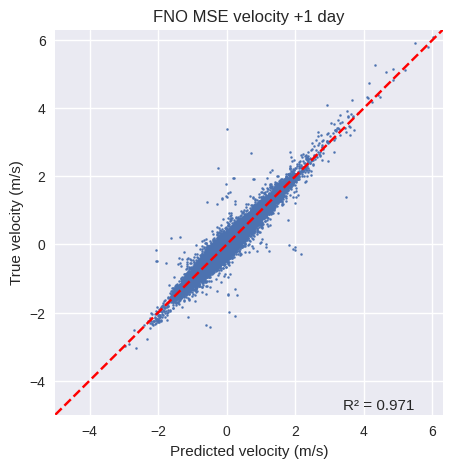

In [ ]:

plt.figure(figsize=(5,5))


model_name = 'FNO MSE'
name       = '+1 day'
plt.style.use('seaborn-v0_8-darkgrid')
plt.title(f"{model_name} velocity {name}")
plt.scatter(FNO_MSE_test_data[:100,...,5+i:6+i], test_data[4][:100,...,0+i:1+i],s=2)
plt.plot(x, x, color='red', linestyle='--')
plt.grid(True)
plt.xlabel('Predicted velocity (m/s)')
plt.ylabel('True velocity (m/s)')
plt.figtext(0.70, 0.12, f"R² = {pearson_correlation_nan(FNO_MSE_test_data[...,5+i:6+i], test_data[4][...,0+i:1+i]):,.3f}",fontsize=11)
plt.xlim(-5, 6.3)
plt.ylim(-5, 6.3)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
nrows=10
ncols=6
# Create a figure with 2 rows and 1 column
fig, axes = plt.subplots(nrows, ncols, figsize=(3*4, 5*4), dpi=300)


model_name = 'FNO MSE'
name       = '+1 day'
x = np.arange(-5, 6.5, 0.1)
plt.style.use('seaborn-v0_8-darkgrid')

for col, model_name in enumerate(list(model_data.keys())):
  for row in range(nrows):
    # print(row,col)
    pred = model_data[model_name][...,0+row:1+row]
    if row < 5:
      true = torch.cat((train_data[3][...,0+row:1+row],test_data[3][...,0+row:1+row]),dim=0)
      axes[row,col].set_title(f"{model_name} U velocity: {row%5+1} day", fontsize=10)
    else:
      row = row-5
      true = torch.cat((train_data[4][...,0+row:1+row],test_data[4][...,0+row:1+row]),dim=0)

      row = row+5
      axes[row,col].set_title(f"{model_name} V velocity: {row%5+1} day", fontsize=10)
    # Create plots on each subplot axis
    # Example: Plot data on the first axis (axes[i])

    axes[row,col].scatter(pred[::2,...],true[::2,...],s=1)
    axes[row,col].plot(x, x, color='red')  # Replace with your data and plotting function

    # Customize each subplot with labels and titles (optional)
    axes[row,col].text(0.75,
                       0.12,
                       f"R² = {pearson_correlation_nan(pred,true):,.3f}",
                       fontsize=10,
                       ha='center',
                       va='center',
                       transform=axes[row,col].transAxes)
    axes[row,col].set_xlabel('Predicted velocity (m/s)', fontsize=7)
    axes[row,col].set_ylabel('True velocity (m/s)', fontsize=7)
    axes[row,col].set_xlim(-5, 6.3)
    axes[row,col].set_ylim(-5, 6.3)

# Similar customization for axes[1] (second subplot)

# Show the plot
plt.tight_layout()  # Adjust spacing between subplots (optional)
fig.savefig("corr.tiff", dpi=300)
fig.savefig("corr.eps", format="eps", dpi=300)
plt.show()

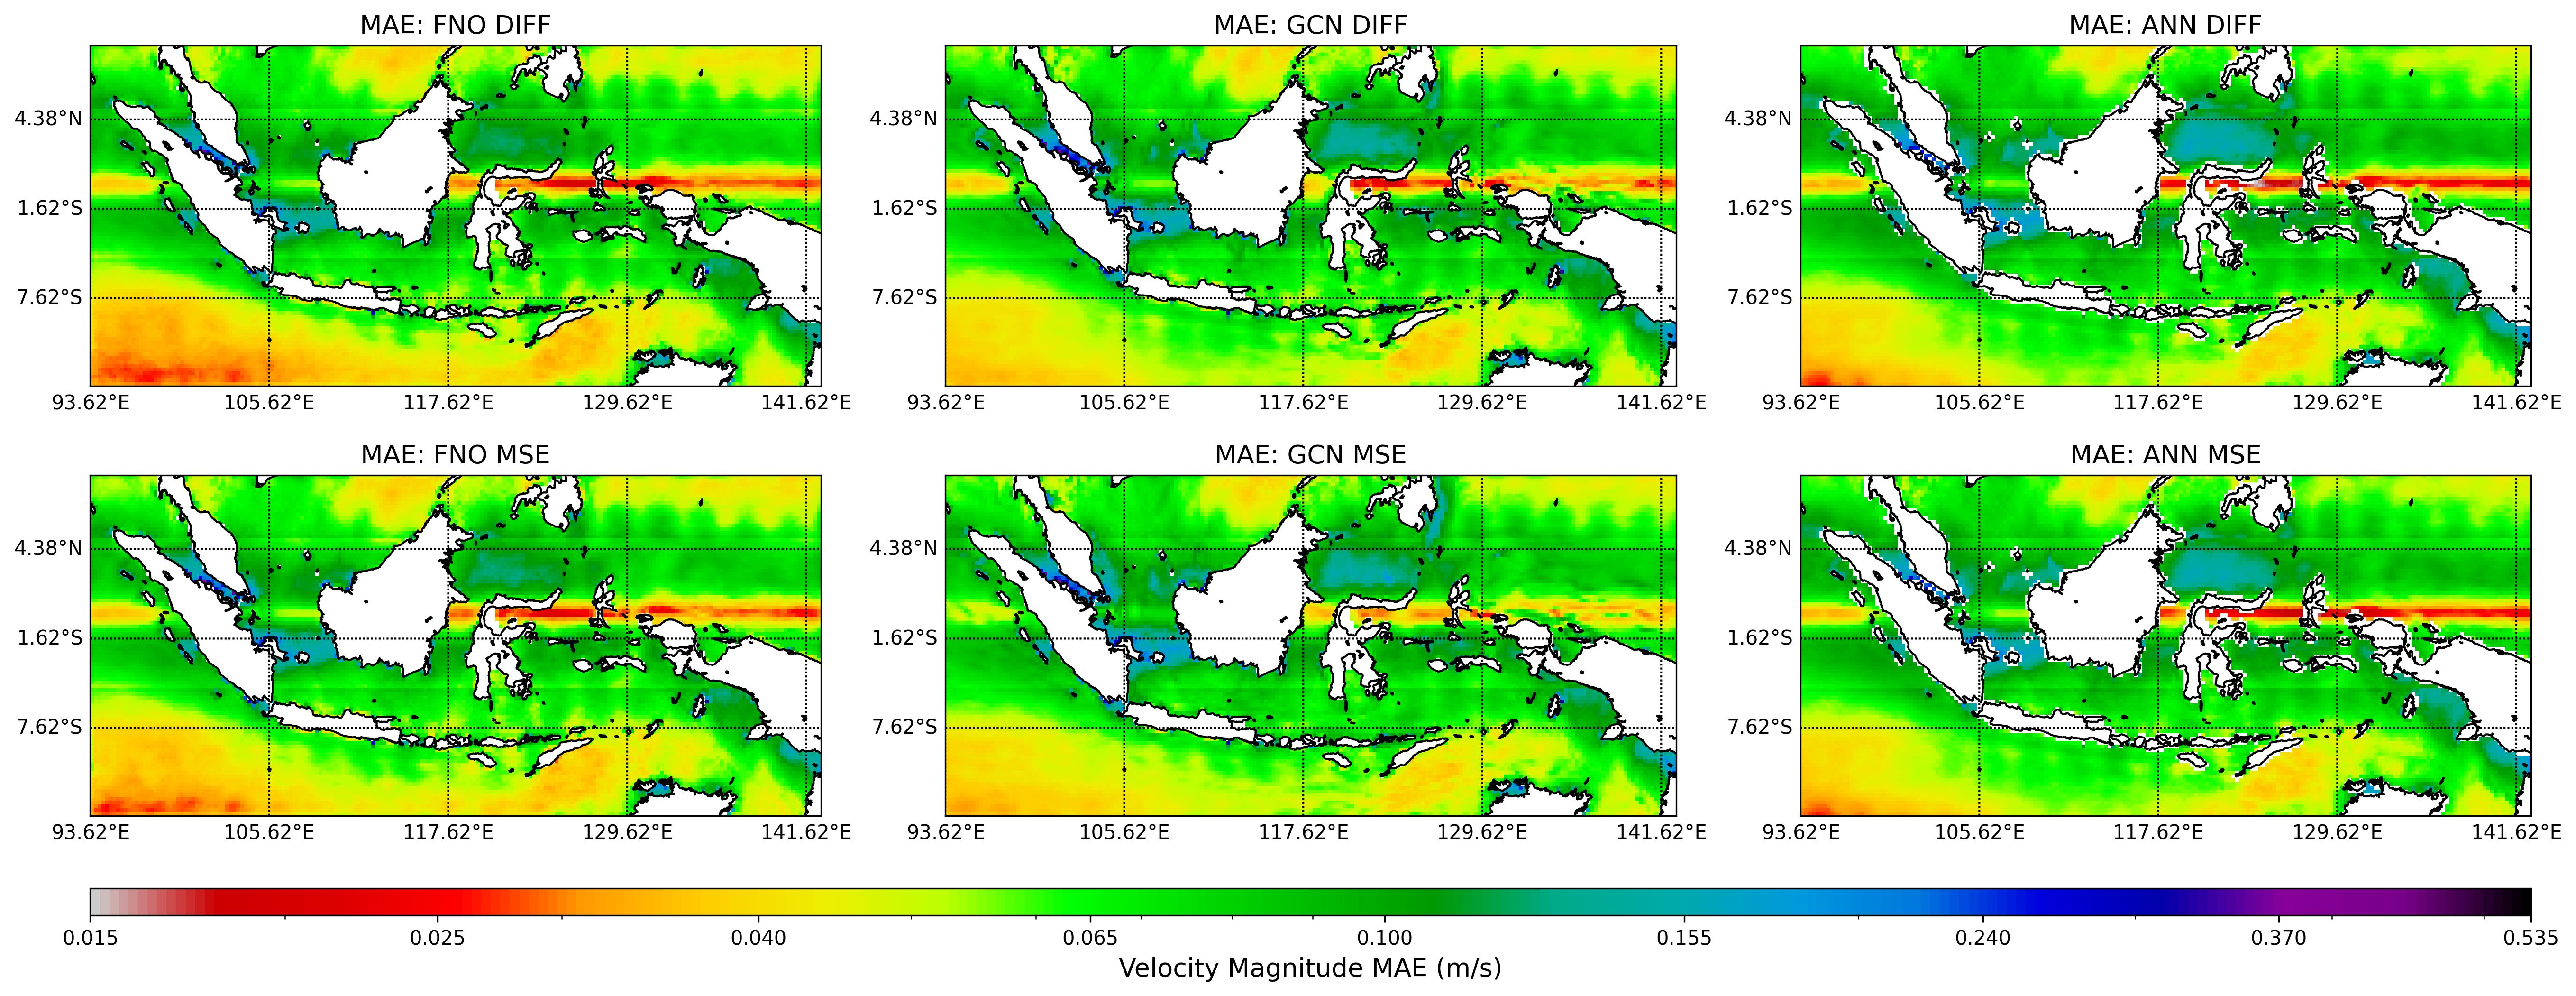

In [ ]:
plt.rcParams['figure.constrained_layout.use'] = True
fig, axes = plt.subplots(2, 3, figsize=(18, 7), dpi=300)

true_u = torch.cat((train_data[3][...,0:5],test_data[3][...,0:5]),dim=0)
true_v = torch.cat((train_data[4][...,0:5],test_data[4][...,0:5]),dim=0)
images = []
for col in range(3):
  for row in range(2):

    model_name = list(model_data.keys())[col+row+col]

    pred_vel = get_magnitude(model_data[model_name][...,:5],model_data[model_name][...,5:])
    true_vel = get_magnitude(true_u,true_v)
    data     = torch.mean(torch.abs(pred_vel - true_vel),dim=[0,3])


    ax = axes[row,col]

    lons,lats = np.meshgrid(np.linspace(93.625,142.625,197),np.linspace(-13.625,9.375,93))

    m = Basemap(llcrnrlon=93.625,llcrnrlat=-13.625,urcrnrlon=142.625,urcrnrlat=9.375,
                lon_0=118, lat_0=-2,projection='cea', resolution ='i', ax=ax)

    m.drawcoastlines()
    m.fillcontinents(color='white')

    m.drawparallels(np.arange(-13.625,9.375,6)[1:],  labels=[1,0,0,0], fontsize=10, fmt = '%.2f')
    m.drawmeridians(np.arange(93.625,142.625,12),labels=[1,1,0,1], fontsize=10, fmt = '%.2f')

    images.append(m.imshow(data, cmap='nipy_spectral_r',norm=colors.LogNorm()))
    axes[row, col].set_title(f'MAE: {model_name}', fontsize=13)
    axes[row, col].label_outer()

vmin = min(image.get_array().min() for image in images)
vmax = max(image.get_array().max() for image in images)
norm = colors.LogNorm(vmin=vmin, vmax=vmax),#colors.Normalize(vmin=vmin, vmax=vmax)
for im in images:
    im.set_clim(vmin,vmax)

ticks_list = [vmin, (vmin+0.1)/2, 0.1, (vmax+0.1)/2, vmax]
cbar = fig.colorbar(images[0],
                    ax=axes,
                    orientation='horizontal',
                    fraction=.1,
                    aspect=90,
                    #ticks_list=ticks_list
                    )
cbar.set_label('Velocity Magnitude MAE (m/s)', fontsize=13)
formatter = ticker.FormatStrFormatter('%.3f')  # Format to 2 decimal places
ticks = [vmin, 0.025, 0.04, 0.065, 0.1, 0.155, 0.24, 0.37, vmax]  # Specify the tick positions
cbar.set_ticks(ticks)
#cbar.set_ticklabels(labels)
cbar.ax.xaxis.set_major_formatter(formatter)
#formatter = ticker.FormatStrFormatter('%.2f')  # Format to 2 decimal places
#cbar.ax.yaxis.set_major_formatter(formatter)
#plt.savefig('fig.png',bbox_inches='tight')

fig.savefig("MAE.tiff", dpi=300)
fig.savefig("MAE.eps", format="eps", dpi=300)

In [ ]:
tick_locator

In [ ]:
plt.rcParams['figure.constrained_layout.use'] = True
fig, axes = plt.subplots(2, 3, figsize=(18, 7), dpi=300)


true_u = torch.cat((train_data[3][...,0:5],test_data[3][...,0:5]),dim=0)
true_v = torch.cat((train_data[4][...,0:5],test_data[4][...,0:5]),dim=0)
images = []
for col in range(3):
  for row in range(2):


    model_name = list(model_data.keys())[col+row+col]


    u_data = model_data[model_name][...,0:5]
    v_data = model_data[model_name][...,5:10]
    data   = get_cosine(true_u,true_v,u_data,v_data,dim=[0,3])

    ax = axes[row,col]

    lons,lats = np.meshgrid(np.linspace(93.625,142.625,197),np.linspace(-13.625,9.375,93))

    m = Basemap(llcrnrlon=93.625,llcrnrlat=-13.625,urcrnrlon=142.625,urcrnrlat=9.375,
                lon_0=118, lat_0=-2,projection='cea', resolution ='i', ax=ax)

    m.drawcoastlines()
    m.fillcontinents(color='white')

    m.drawparallels(np.arange(-13.625,9.375,6)[1:],  labels=[1,0,0,0], fontsize=10, fmt = '%.2f')
    m.drawmeridians(np.arange(93.625,142.625,12),labels=[1,1,0,1], fontsize=10, fmt = '%.2f')

    images.append(m.imshow(data, cmap='nipy_spectral_r'))
    axes[row, col].set_title(f'Cosine Distance: {model_name}', fontsize=13)
    axes[row, col].label_outer()

vmin = min(image.get_array().min() for image in images)
vmax = max(image.get_array().max() for image in images)
norm = colors.Normalize(vmin=vmin, vmax=vmax)
for im in images:
    im.set_norm(norm)


cbar = fig.colorbar(images[0], ax=axes, orientation='horizontal', fraction=.1,  aspect=90)
cbar.set_label('Velocity Direction Cosine Distance (°)', fontsize=13)
#plt.savefig('fig.png',bbox_inches='tight')

fig.savefig("COSINE.tiff", dpi=300)
fig.savefig("COSINE.eps", format="eps", dpi=300)

In [ ]:
plot_line_vel = {}
plot_line_vel['day'] = []
plot_line_vel['MAE'] = []
plot_line_vel['model_name'] = []

plot_hist_vel = {}
plot_hist_vel['MAE'] = []
plot_hist_vel['model_name'] = []
for model_name in model_data.keys():
  #pred velocity
  pred_vel = get_magnitude(model_data[model_name][...,:5],model_data[model_name][...,5:])

  #clean data
  data = torch.flatten(torch.mean(torch.abs(pred_vel - true_vel),dim=[3]))

  #filternan
  mask = torch.isnan(data)
  filtered_data = data[~mask]

  # Sample size (1000)
  sample_size = 1000

  # Approach 1: Using torch.randperm for shuffling and slicing
  # Generate a random permutation of indices
  perm = torch.randperm(filtered_data.size(0))

  # Take the first 1000 elements from the shuffled indices
  sampled_indices = perm[:sample_size]

  # Sample data using the random indices
  plot_hist_vel['MAE'] += filtered_data[sampled_indices].tolist()
  plot_line_vel['MAE'] += torch.nanmean(torch.abs(pred_vel-true_vel),dim=[0,1,2]).tolist()
  plot_hist_vel['model_name'] += [model_name.split(' ')[0]]*sample_size
  plot_line_vel['model_name'] += [model_name]*5
  plot_line_vel['day'] +=[i for i in range(1,6)]

In [ ]:
plot_line_u = {}
plot_line_u['day'] = []
plot_line_u['MAE'] = []
plot_line_u['model_name'] = []

plot_hist_u = {}
plot_hist_u['MAE'] = []
plot_hist_u['model_name'] = []
for model_name in model_data.keys():
  #pred velocity
  pred_vel = model_data[model_name][...,:5]

  #clean data
  data = torch.flatten(torch.mean(torch.abs(pred_vel - true_u),dim=[3]))

  #filternan
  mask = torch.isnan(data)
  filtered_data = data[~mask]

  # Sample size (1000)
  sample_size = 1000

  # Approach 1: Using torch.randperm for shuffling and slicing
  # Generate a random permutation of indices
  perm = torch.randperm(filtered_data.size(0))

  # Take the first 1000 elements from the shuffled indices
  sampled_indices = perm[:sample_size]

  # Sample data using the random indices
  plot_hist_u['MAE'] += filtered_data[sampled_indices].tolist()
  plot_line_u['MAE'] += torch.nanmean(torch.abs(pred_vel-true_u),dim=[0,1,2]).tolist()
  plot_hist_u['model_name'] += [model_name.split(' ')[0]]*sample_size
  plot_line_u['model_name'] += [model_name]*5
  plot_line_u['day'] +=[i for i in range(1,6)]

In [ ]:
plot_line_v = {}
plot_line_v['day'] = []
plot_line_v['MAE'] = []
plot_line_v['model_name'] = []

plot_hist_v = {}
plot_hist_v['MAE'] = []
plot_hist_v['model_name'] = []
for model_name in model_data.keys():
  #pred velocity
  pred_vel = model_data[model_name][...,5:]

  #clean data
  data = torch.flatten(torch.mean(torch.abs(pred_vel - true_v),dim=[3]))

  #filternan
  mask = torch.isnan(data)
  filtered_data = data[~mask]

  # Sample size (1000)
  sample_size = 1000

  # Approach 1: Using torch.randperm for shuffling and slicing
  # Generate a random permutation of indices
  perm = torch.randperm(filtered_data.size(0))

  # Take the first 1000 elements from the shuffled indices
  sampled_indices = perm[:sample_size]

  # Sample data using the random indices
  plot_hist_v['MAE'] += filtered_data[sampled_indices].tolist()
  plot_line_v['MAE'] += torch.nanmean(torch.abs(pred_vel-true_v),dim=[0,1,2]).tolist()
  plot_hist_v['model_name'] += [model_name.split(' ')[0]]*sample_size
  plot_line_v['model_name'] += [model_name]*5
  plot_line_v['day'] +=[i for i in range(1,6)]

In [ ]:
plot_line_d = {}
plot_line_d['day'] = []
plot_line_d['degree'] = []
plot_line_d['model_name'] = []

plot_hist_d = {}
plot_hist_d['degree'] = []
plot_hist_d['model_name'] = []
for model_name in model_data.keys():
  #pred velocity
  u_data = model_data[model_name][...,0:5]
  v_data = model_data[model_name][...,5:10]

  #clean data
  data = torch.flatten(get_cosine(true_u,true_v,u_data,v_data,dim=[3]))

  #filternan
  mask = torch.isnan(data)
  filtered_data = data[~mask]

  # Sample size (1000)
  sample_size = 1000

  # Approach 1: Using torch.randperm for shuffling and slicing
  # Generate a random permutation of indices
  perm = torch.randperm(filtered_data.size(0))

  # Take the first 1000 elements from the shuffled indices
  sampled_indices = perm[:sample_size]

  # Sample data using the random indices
  plot_hist_d['degree'] += filtered_data[sampled_indices].tolist()
  plot_line_d['degree'] += get_cosine(true_u,true_v,u_data,v_data,dim=[0,1,2]).tolist()
  plot_hist_d['model_name'] += [model_name.split(' ')[0]]*sample_size
  plot_line_d['model_name'] += [model_name]*5
  plot_line_d['day'] +=[i for i in range(1,6)]

<ipython-input-4-a98b399d8bc9>:46: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  angle_radians = torch.acos(torch.tensor(cosine_similarity))


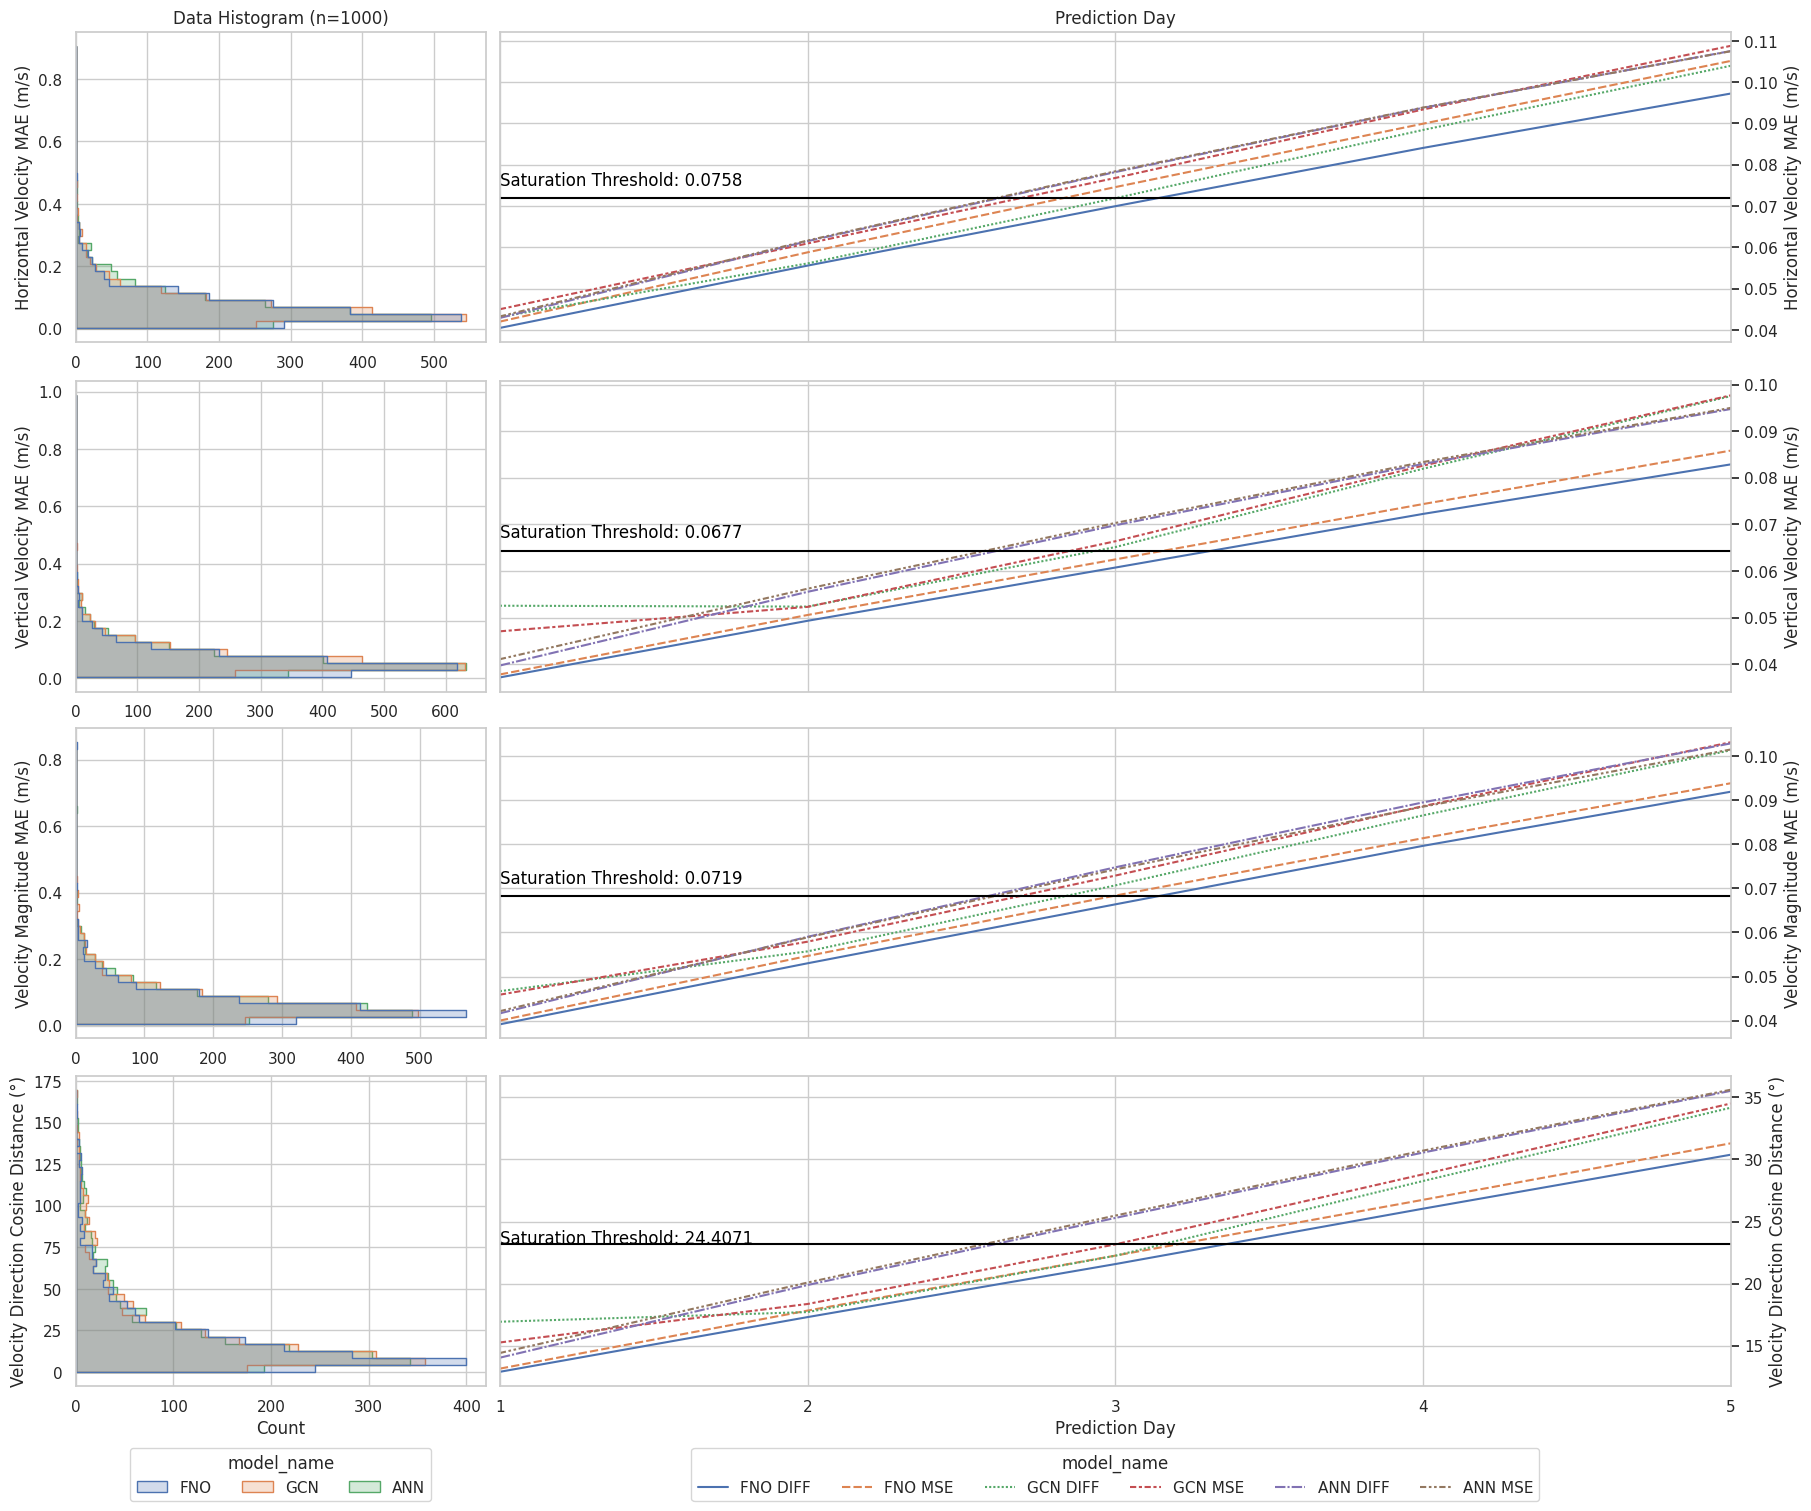

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np

# Create a GridSpec with 3 rows and 3 columns
fig = plt.figure(constrained_layout=True,figsize=(18, 15))
gs = gridspec.GridSpec(4, 4, figure=fig)

# Create a large subplot that spans the first two rows and the first two columns
ax1 = fig.add_subplot(gs[0, 0])
sns.histplot(pd.DataFrame(plot_hist_u),y='MAE',hue='model_name',bins=40, element="step", ax=ax1)
plt.ylabel('Horizontal Velocity MAE (m/s)')
ax1.set_xlabel(None)
plt.title("Data Histogram (n=1000)")
ax1.get_legend().remove()
# Create a smaller subplot in the third row and first column
ax2 = fig.add_subplot(gs[0, 1:])
sns.lineplot(data=pd.DataFrame(plot_line_u),
             x='day',
             y='MAE',
             hue='model_name',
             style='model_name')
plt.axhline(pd.DataFrame(plot_hist_u)['MAE'].mean()*0.95,0,1,c='black')
ax2.text(x=1, y=pd.DataFrame(plot_hist_u)['MAE'].mean()+0.0025, s=f"Saturation Threshold: {pd.DataFrame(plot_hist_u)['MAE'].mean():.4f}", color="black", fontsize=12, ha='left', va='top')
plt.xlim(1,5)
plt.title("Prediction Day")
ax2.set_xlabel(None)
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
plt.ylabel('Horizontal Velocity MAE (m/s)')
ax2.set_xticks([1,2,3,4,5])
ax2.set_xticklabels([])
ax2.get_legend().remove()
#-------------------------------------------------------------------------------

# Create a large subplot that spans the first two rows and the first two columns
ax1 = fig.add_subplot(gs[1, 0])
sns.histplot(pd.DataFrame(plot_hist_v),y='MAE',hue='model_name',bins=40, element="step", ax=ax1)
plt.ylabel('Vertical Velocity MAE (m/s)')
ax1.set_xlabel(None)
ax1.set_title(None)
# Create a smaller subplot in the third row and first column
ax2 = fig.add_subplot(gs[1, 1:])
ax2.set_title("Small Subplot 1")
sns.lineplot(data=pd.DataFrame(plot_line_v),
             x='day',
             y='MAE',
             hue='model_name',
             style='model_name')
plt.axhline(pd.DataFrame(plot_hist_v)['MAE'].mean()*0.95,0,1,c='black')
ax1.get_legend().remove()
ax2.text(x=1, y=pd.DataFrame(plot_hist_v)['MAE'].mean()+0.0025, s=f"Saturation Threshold: {pd.DataFrame(plot_hist_v)['MAE'].mean():.4f}", color="black", fontsize=12, ha='left', va='top')
plt.xlim(1,5)
ax2.set_title(None)
ax2.set_xlabel(None)
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
plt.ylabel('Vertical Velocity MAE (m/s)')
ax2.set_xticks([1,2,3,4,5])
ax2.set_xticklabels([])
ax2.get_legend().remove()
#-------------------------------------------------------------------------------

# Create a large subplot that spans the first two rows and the first two columns
ax1 = fig.add_subplot(gs[2, 0])
sns.histplot(pd.DataFrame(plot_hist_vel),y='MAE',hue='model_name',bins=40, element="step", ax=ax1)
plt.ylabel('Velocity Magnitude MAE (m/s)')
ax1.set_title(None)
ax1.set_xlabel(None)
ax1.get_legend().remove()
# Create a smaller subplot in the third row and first column
ax2 = fig.add_subplot(gs[2, 1:])
sns.lineplot(data=pd.DataFrame(plot_line_vel),
             x='day',
             y='MAE',
             hue='model_name',
             style='model_name')
plt.axhline(pd.DataFrame(plot_hist_vel)['MAE'].mean()*0.95,0,1,c='black')
ax2.text(x=1, y=pd.DataFrame(plot_hist_vel)['MAE'].mean()+0.0025, s=f"Saturation Threshold: {pd.DataFrame(plot_hist_vel)['MAE'].mean():.4f}", color="black", fontsize=12, ha='left', va='top')
plt.xlim(1,5)
ax2.set_title(None)
ax2.set_xlabel(None)
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
plt.ylabel('Velocity Magnitude MAE (m/s)')
ax2.set_xticks([1,2,3,4,5])
ax2.set_xticklabels([])
ax2.get_legend().remove()
#------------------------------------------------------------------------------

# Create a large subplot that spans the first two rows and the first two columns
ax3 = fig.add_subplot(gs[3, 0])
sns.histplot(pd.DataFrame(plot_hist_d),y='degree',hue='model_name',bins=40, element="step", ax=ax3)
plt.ylabel('Velocity Direction Cosine Distance (°)')
ax3.set_title(None)
ax3.set_xlabel('Count')
sns.move_legend(ax3, loc='upper center', bbox_to_anchor=(0.5, -0.175), ncol=3)

# Create a smaller subplot in the third row and first column
ax2 = fig.add_subplot(gs[3, 1:])
sns.lineplot(data=pd.DataFrame(plot_line_d),
             x='day',
             y='degree',
             hue='model_name',
             style='model_name')

plt.axhline(pd.DataFrame(plot_hist_d)['degree'].mean()*0.95,0,1,c='black')
ax2.text(x=1, y=pd.DataFrame(plot_hist_d)['degree'].mean()+0.0025, s=f"Saturation Threshold: {pd.DataFrame(plot_hist_d)['degree'].mean():.4f}", color="black", fontsize=12, ha='left', va='top')
plt.xlim(1,5)
ax2.set_title(None)
ax2.set_xlabel(None)
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
ax2.set_xticks([1,2,3,4,5])
plt.ylabel('Velocity Direction Cosine Distance (°)')
plt.xlabel('Prediction Day')
sns.move_legend(ax2, loc='upper center', bbox_to_anchor=(0.5, -0.175), ncol=6)
# ax2.get_legend().remove()
# handles, labels = ax2.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=len(labels))

fig.savefig("Day.tiff", dpi=300)
fig.savefig("Day.eps", format="eps", dpi=300)
# Display the plot
#plt.show()

In [ ]:
round(2.3098098080,2)

2.31

<ipython-input-307-724a11466102>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df["A"], kde=True, ax=ax, palette="viridis")
<ipython-input-307-724a11466102>:23: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(bottom=0.25)  # Adjust this value if needed


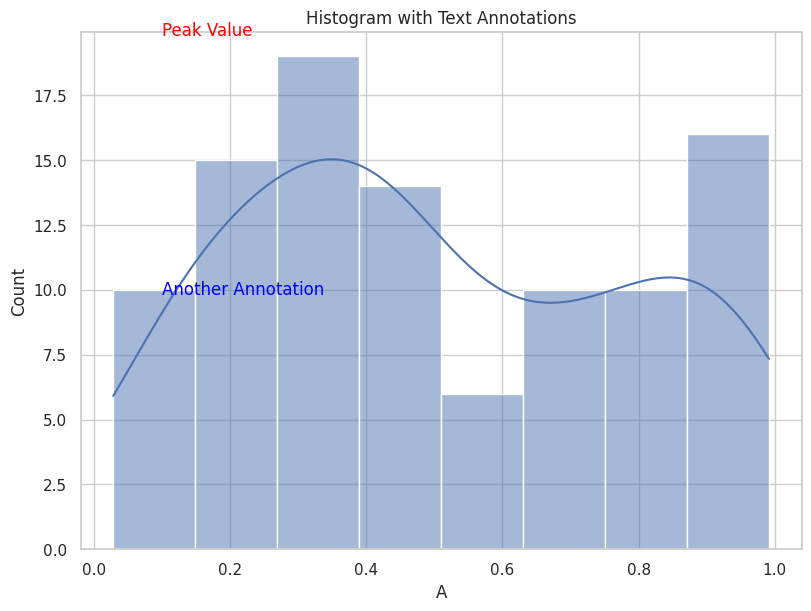

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Generate some example data
data = np.random.rand(100, 4)
df = pd.DataFrame(data, columns=["A", "B", "C", "D"])

# Create a figure and an axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with Seaborn
sns.histplot(df["A"], kde=True, ax=ax, palette="viridis")

# Set the title
ax.set_title("Histogram with Text Annotations")

# Add text annotations
ax.text(x=0.1, y=20, s="Peak Value", color="red", fontsize=12, ha='left', va='center')
ax.text(x=0.1, y=10, s="Another Annotation", color="blue", fontsize=12, ha='left', va='center')
# Adjust layout to make space for the legend
plt.subplots_adjust(bottom=0.25)  # Adjust this value if needed

# Display the plot
fig.savefig("COSINE.tiff", dpi=300)
fig.savefig("COSINE.eps", format="eps", dpi=300)

KeyError: 'model name'

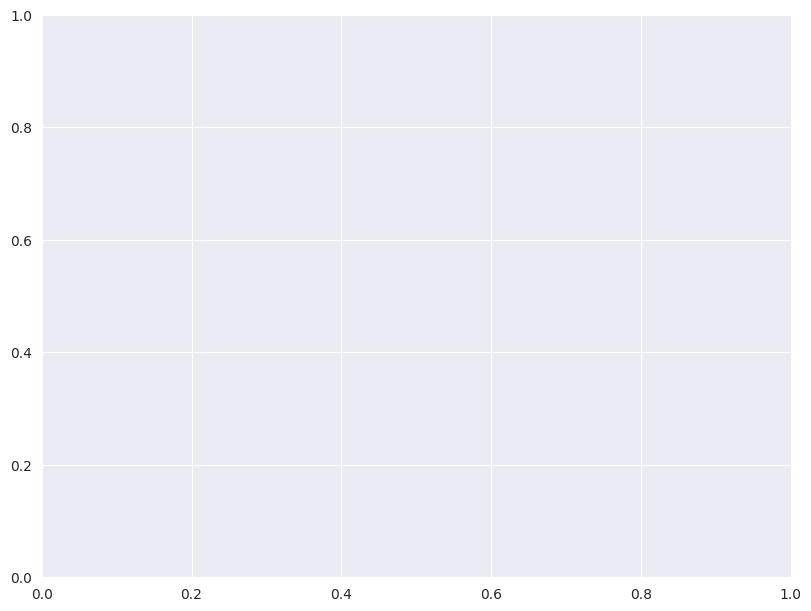

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Generate some example data
data = np.random.rand(100, 4)
df = pd.DataFrame(plot_hist_d)

# Create a figure and an axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with Seaborn
sns.histplot(df["degree"], kde=True, ax=ax, hue=df["model name"], palette="viridis")

# Set the title
ax.set_title("Histogram with Legend Under the Plot")

# Adjust the legend to be under the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3, frameon=False)

# Adjust layout to make space for the legend
plt.subplots_adjust(bottom=0.25)  # Adjust this value if needed

# Display the plot
plt.show()